# Plot Biomass figure 1

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [105]:
dfbiomass = pd.read_csv('biomass_aboveGround.csv',sep = '\t', header=None )
dfbiomass.columns = ['Species','Biomass','Condition']
#dfbiomass.set_index('Species',inplace=True)
dfbiomass.head()

,Species,Biomass,Condition
0,Maize,3.84,Full
1,Maize,3.92,Full
2,Maize,3.84,Full
3,Maize,4.12,Full
4,Maize,3.91,Full


In [106]:
group = dfbiomass.groupby('Species')
for g in group:
    Species = list(set(g[1]['Species']))[0]
    Full = g[1]['Biomass'][:5]
    N_dep = g[1]['Biomass'][5:10]
    P_dep = g[1]['Biomass'][10:15]
    tFN = ttest_ind(Full,N_dep)
    tFP = ttest_ind(Full,P_dep)
    print(Species,'N_dep:', tFN[1])
    print(Species,'P_dep:', tFP[1])  

Maize N_dep: 1.7075839628578e-06
Maize P_dep: 1.5924332407811203e-08
Paspalum N_dep: 0.6561353080669026
Paspalum P_dep: 0.8572252285009325
Sorghum N_dep: 5.105053911884682e-06
Sorghum P_dep: 0.006934379848762356


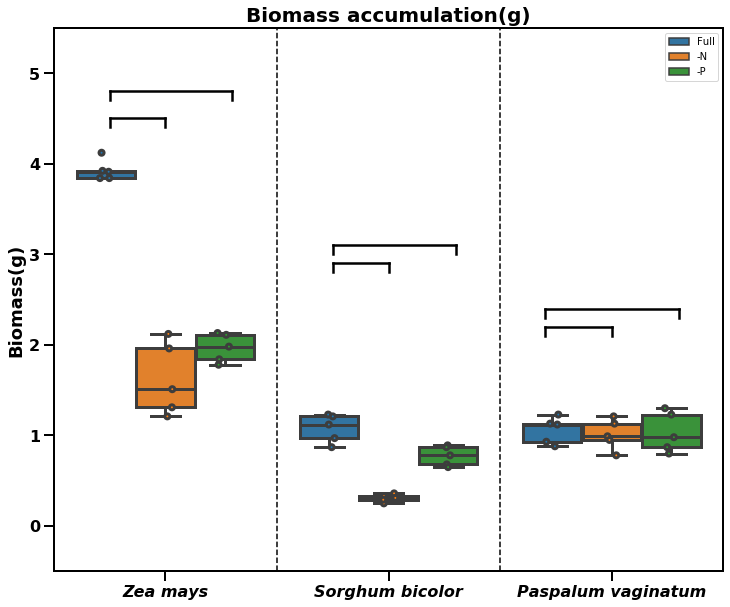

In [116]:
dfbiomass = pd.read_csv('biomass_aboveGround.csv',sep = '\t', header=None )
dfbiomass.columns = ['Species','Biomass','Condition']

import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.family']=['sans-serif']

fig,ax=plt.subplots(figsize=(12,10))

sns.boxplot(x="Species", hue="Condition", y="Biomass", data=dfbiomass,ax=ax, dodge=True, fliersize=0,linewidth=3)
sns.stripplot(x="Species", y="Biomass", hue="Condition", data=dfbiomass, dodge=True,linewidth=3, ax=ax)
handles, labels = ax.get_legend_handles_labels()
l = ax.legend(handles[:3], labels[:3])
plt.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
plt.axvline(1.5,color='black',linestyle= '--', linewidth=1.5)

ax.set_xlim(-0.5,2.5)
ax.set_ylim(-0.5,5.5)
ax.set_yticklabels([0,0,1,2,3,4,5],size=16,color='k',fontweight='bold')
ax.set_xticklabels(['Zea mays','Sorghum bicolor','Paspalum vaginatum'],size=16,color='k',fontweight='bold', fontstyle='italic')
ax.set_ylabel('Biomass(g)',size=18, color='black',fontweight='bold')
ax.set_xlabel('')

plt.title('Biomass accumulation(g)',size=20,color='k',fontweight='bold')

plt.plot([-0.25,0], [4.5, 4.5], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([-0.25,0.3], [4.8, 4.8], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.plot([0.75,1.0], [2.9, 2.9], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.75,1.3], [3.1, 3.1], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.plot([1.7,2.0], [2.2, 2.2], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.7,2.3], [2.4, 2.4], linewidth=2.5, solid_joinstyle = 'miter', color='k')

#plot vertical ticks for the bars
plt.plot([-0.25,-0.25], [4.5, 4.4], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([0,0], [4.5, 4.4], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([-0.25,-0.25], [4.8, 4.7], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.3,0.3], [4.8, 4.7], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.plot([0.75,0.75], [2.8, 2.9], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.75,0.75], [3.0, 3.1], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.3,1.3], [3.0, 3.1], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.0,1.0], [2.8, 2.9], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.plot([1.7,1.7], [2.1, 2.2], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.7,1.7], [2.3, 2.4], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([2.3,2.3], [2.3, 2.4], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([2.0,2.0], [2.1, 2.2], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.savefig('Biomass.svg')

## Plot Validamycin treatment results

In [31]:
#dfbiomass = pd.read_csv('Old_data/Fresh_BioMass_ValA.csv',sep = ',' )
dfbiomass = pd.read_csv('Fresh_BioMass_ValA.csv',sep = ',' )
dfAbove = dfbiomass.drop(labels='Root',axis=1)
dfRoot = dfbiomass.drop(labels='AboveGround',axis=1)
dfAbove.head()

,Species,AboveGround,Shoot_to_root,WholePlant,Condition,Treatment
0,Maize,4.23,2.595092,5.86,Full,NO_ValA
1,Maize,3.34,1.908571,5.09,Full,NO_ValA
2,Maize,3.52,1.751244,5.53,Full,NO_ValA
3,Maize,4.56,1.740458,7.18,Full,NO_ValA
4,Maize,3.62,1.989011,5.44,Full,NO_ValA


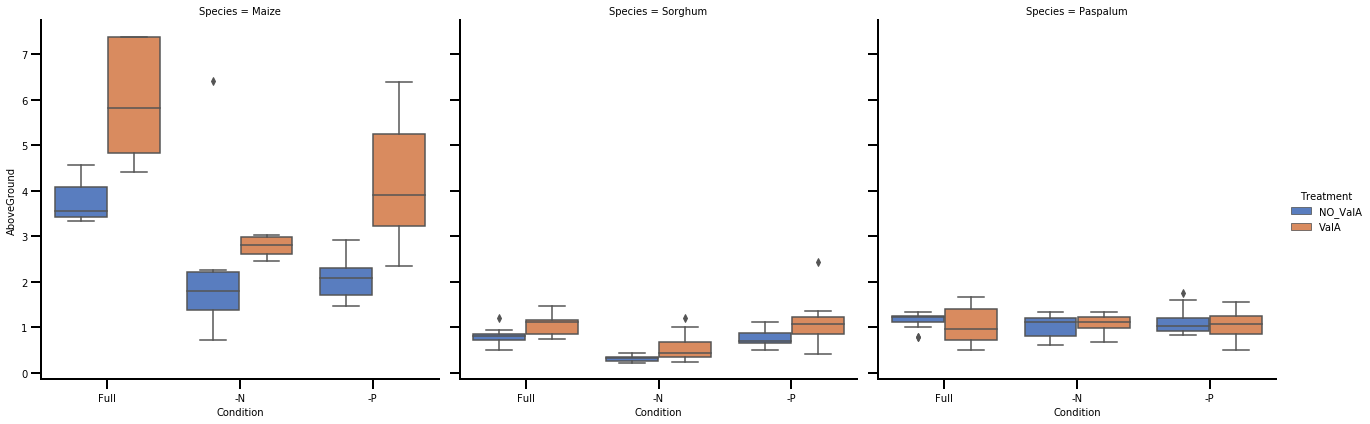

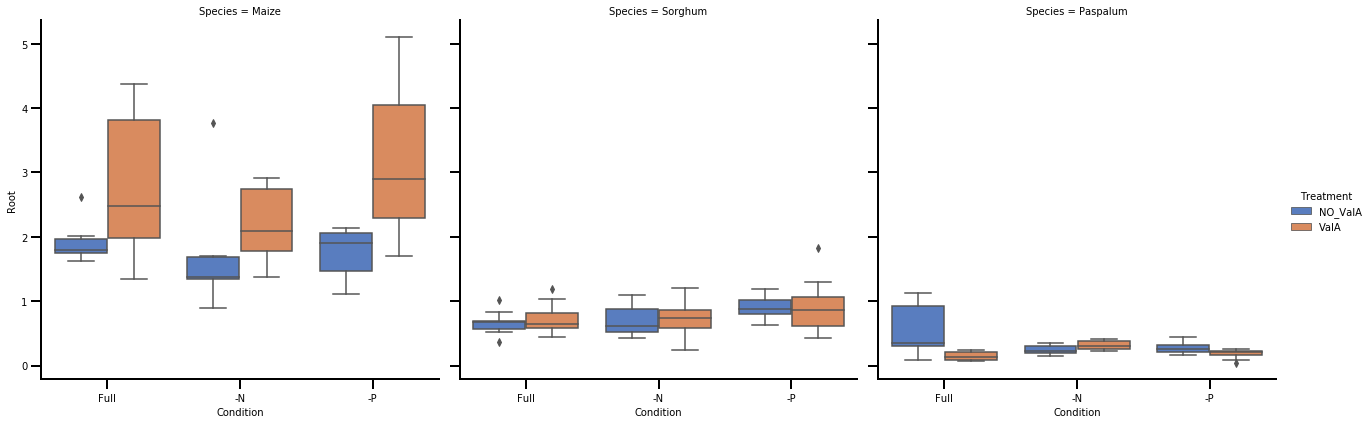

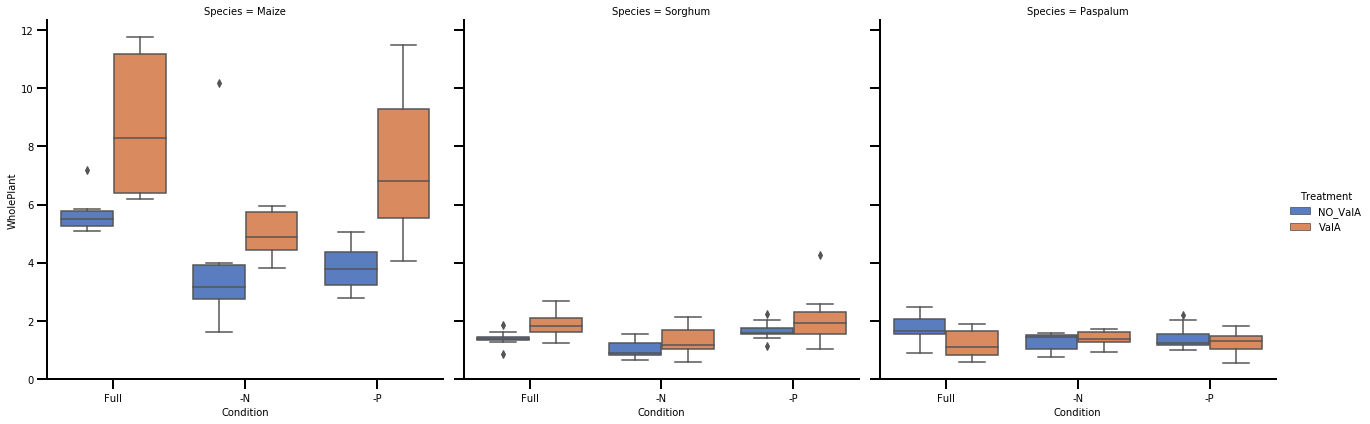

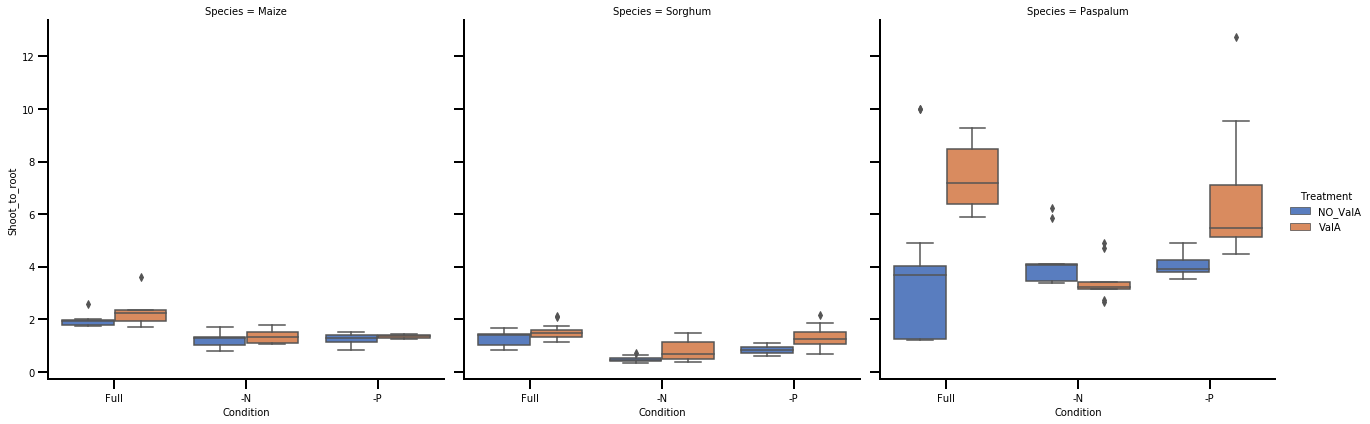

In [37]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.family']=['sans-serif']

dfbiomass = pd.read_csv('Fresh_BioMass_ValA.csv',sep = ',' )
#sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind="bar", palette="muted", ax=axes[i])
#sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted")
#sns.catplot(x="Condition", y="Root", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted")
sns.catplot(x="Condition", y="WholePlant", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted")
#sns.catplot(x="Condition", y="Shoot_to_root", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted")


Maize Full: 0.0010015384413489443
Maize N_dep: 0.005401510807259953
Maize P_dep: 0.005185421681687084
Paspalum Full: 0.5797925492117992
Paspalum N_dep: 0.7268104642853929
Paspalum P_dep: 0.76770543030894
Sorghum Full: 0.05159152993360972
Sorghum N_dep: 0.0054228919211681565
Sorghum P_dep: 0.22031305454744515


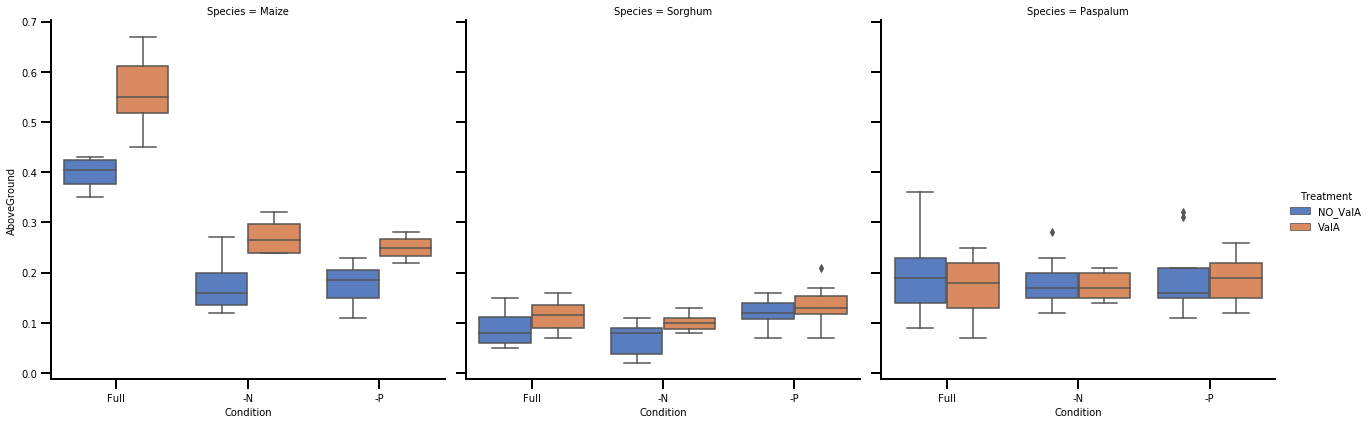

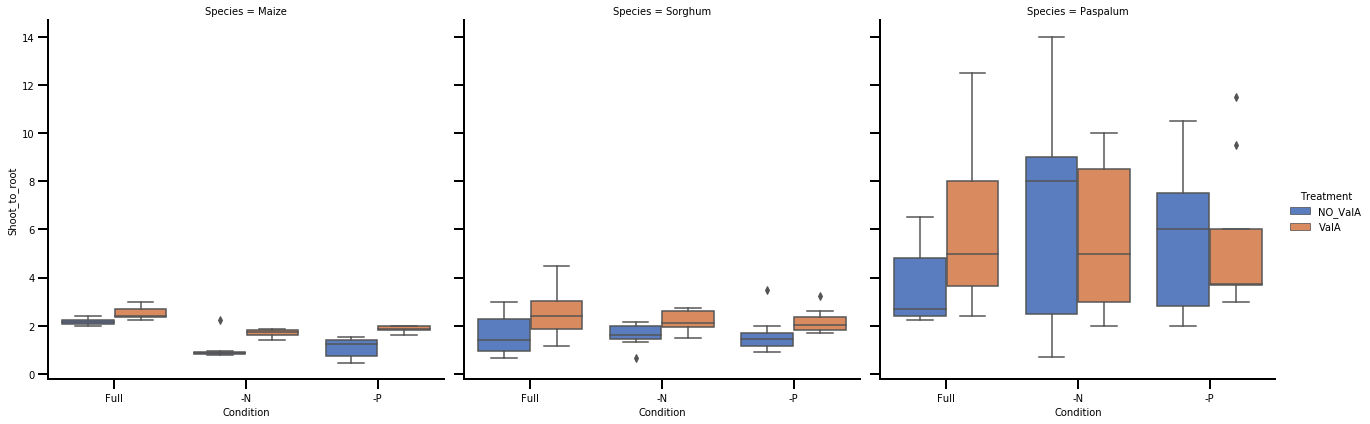

In [81]:
dfdry = pd.read_csv('DryWeight_ValA.csv',sep = ',' )
#sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind="bar", palette="muted", ax=axes[i])
sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted")
#sns.catplot(x="Condition", y="Root", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted")
#sns.catplot(x="Condition", y="WholePlant", hue="Treatment", col = 'Species', data=dfdry, height=6, kind='box',palette="muted")
sns.catplot(x="Condition", y="Shoot_to_root", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',dodge=True, palette="muted")
dfgroup=dfdry.groupby('Species')
for group in dfgroup:
    df = pd.DataFrame(group[1][['Species','AboveGround','Shoot_to_root','Condition','Treatment']])
    df.set_index(['Condition','Treatment'],inplace=True)
    Species = group[0]
    #print(df.loc['Full'])
    F_NT = df.loc['Full'].loc['NO_ValA'].AboveGround.values
    F_Va = df.loc['Full'].loc['ValA'].AboveGround.values
    N_NT = df.loc['-N'].loc['NO_ValA'].AboveGround.values
    N_Va = df.loc['-N'].loc['ValA'].AboveGround.values
    P_NT = df.loc['-P'].loc['NO_ValA'].AboveGround.values
    P_Va = df.loc['-P'].loc['ValA'].AboveGround.values
    
    tFULL = ttest_ind(F_NT,F_Va)
    tNdep = ttest_ind(N_NT,N_Va)
    tPdep = ttest_ind(P_NT,P_Va)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])

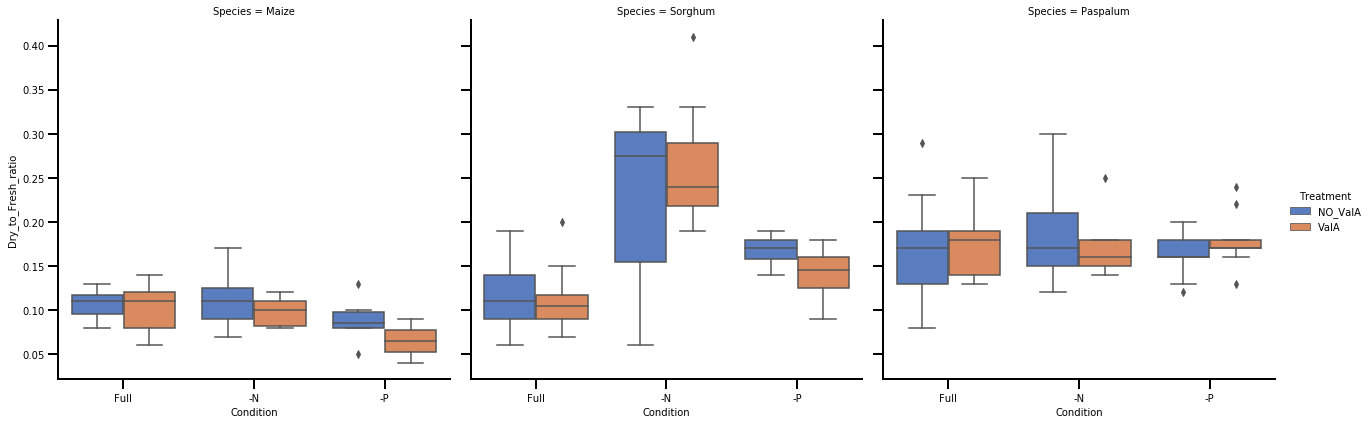

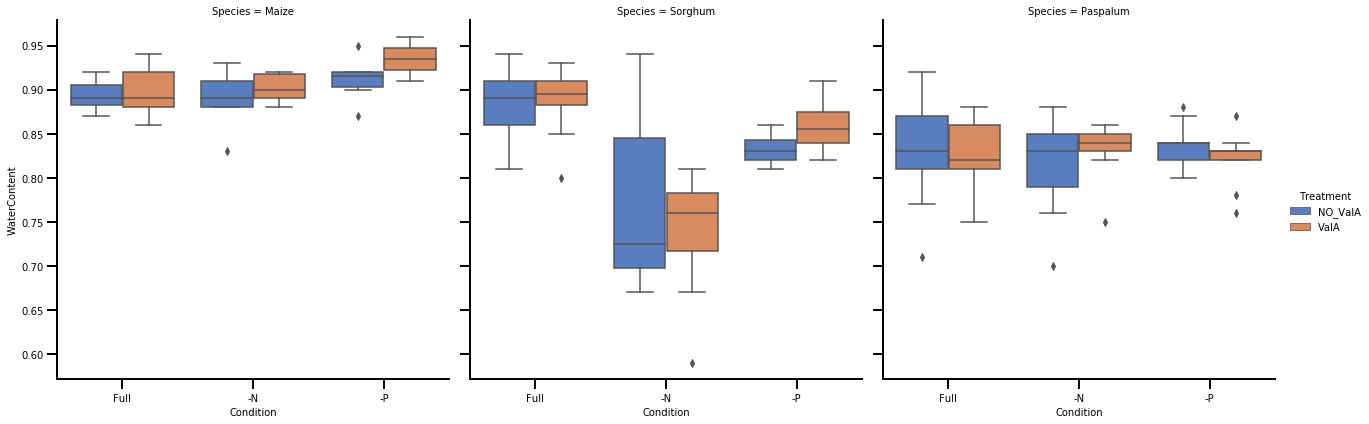

In [47]:
dfratio = pd.read_csv('Dry_Fresh_Ratio.csv',sep = '\t' )
#sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind="bar", palette="muted", ax=axes[i])
sns.catplot(x="Condition", y="Dry_to_Fresh_ratio", hue="Treatment", col = 'Species', data=dfratio, height=6, kind='box',palette="muted")
sns.catplot(x="Condition", y="WaterContent", hue="Treatment", col = 'Species', data=dfratio, height=6, kind='box',palette="muted")


In [58]:
dfgroup=dfratio.groupby('Species')
for group in dfgroup:
    df = pd.DataFrame(group[1][['Species','WaterContent','Condition','Treatment']])
    df.set_index(['Condition','Treatment'],inplace=True)
    Species = group[0]
    #print(df.loc['Full'])
    F_NT = df.loc['Full'].loc['NO_ValA'].WaterContent.values
    F_Va = df.loc['Full'].loc['ValA'].WaterContent.values
    N_NT = df.loc['-N'].loc['NO_ValA'].WaterContent.values
    N_Va = df.loc['-N'].loc['ValA'].WaterContent.values
    P_NT = df.loc['-P'].loc['NO_ValA'].WaterContent.values
    P_Va = df.loc['-P'].loc['ValA'].WaterContent.values
    
    tFULL = ttest_ind(F_NT,F_Va)
    tNdep = ttest_ind(N_NT,N_Va)
    tPdep = ttest_ind(P_NT,P_Va)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])

Maize Full: 0.7686030506769111
Maize N_dep: 0.44997388640148483
Maize P_dep: 0.10773786114082226
Paspalum Full: 0.9305464212760113
Paspalum N_dep: 0.40700304030531587
Paspalum P_dep: 0.28145895122545406
Sorghum Full: 0.6106856221184415
Sorghum N_dep: 0.35787003319551003
Sorghum P_dep: 0.004559231671826445


In [4]:
GroupAbove = dfAbove.groupby('Species')
for x,y in enumerate(GroupAbove):
    print(y[1].set_index(['Treatment','Condition']))#.loc['NO_ValA'].loc['Full'].Biomass.values)

                    Species  AboveGround  Shoot_to_root
Treatment Condition                                    
NO_ValA   Full        Maize         4.23            2.6
          Full        Maize         3.34            1.9
          Full        Maize         3.52            1.8
          Full        Maize         4.56            1.7
          Full        Maize         3.62            2.0
          Full        Maize         3.41            1.9
          -N          Maize         2.16            1.3
          -N          Maize         1.29            1.0
          -N          Maize         0.72            0.8
          -N          Maize         1.49            1.1
          -N          Maize         1.80            1.3
          -N          Maize         2.27            1.3
          -P          Maize         2.30            1.1
          -P          Maize         1.48            0.8
          -P          Maize         1.67            1.5
          -P          Maize         2.92        

Maize
Maize Full: 0.002114036053744272
Maize N_dep: 0.0010229983136436326
Maize P_dep: 0.009282151462359544
Paspalum
Paspalum Full: 0.5269266491203701
Paspalum N_dep: 0.7425917169809231
Paspalum P_dep: 0.5254840159997757
Sorghum
Sorghum Full: 0.003964895972288073
Sorghum N_dep: 0.002457899207459546
Sorghum P_dep: 0.02725520994468761
Maize
Maize Full: 0.4232174806840505
Maize N_dep: 0.18436950969903873
Maize P_dep: 0.30383688328166325
Paspalum
Paspalum Full: 0.0004980921917074313
Paspalum N_dep: 0.10250397591848763
Paspalum P_dep: 0.017367413836069066
Sorghum
Sorghum Full: 0.028648513683819155
Sorghum N_dep: 0.07971599564941145
Sorghum P_dep: 0.00027971878806095485


' \nfor i,g in enumerate(GroupRoot):\n    ax = axes[1,i]\n    Species = list(set(g[1][\'Species\']))[0]\n    print(Species)\n    sns.boxplot(x="Condition",  y="Root", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)\n    sns.stripplot(x="Condition", y="Root", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)\n    \n    handles, labels = ax.get_legend_handles_labels()\n    l = ax.legend(handles[:2], labels[:2])\n    \n    ax.set_xlim(-0.5,2.5)\n    ax.set_ylim(0,1)\n    ax.axvline(0.5,color=\'black\',linestyle= \'--\', linewidth=1.5)\n    ax.axvline(1.5,color=\'black\',linestyle= \'--\', linewidth=1.5)\n    \n    dfGroupRoot = g[1].set_index([\'Treatment\',\'Condition\'])\n    Full_NO_ValA = dfGroupRoot.loc[\'NO_ValA\'].loc[\'Full\'].Root.values\n    N_dep_NO_ValA = dfGroupRoot.loc[\'NO_ValA\'].loc[\'-N\'].Root.values\n    P_dep_NO_ValA = dfGroupRoot.loc[\'NO_ValA\'].loc[\'-P\'].Root.values\n    Full_ValA = dfGroupRoot.loc[\'ValA\'].loc[\'Full\'].Root.valu

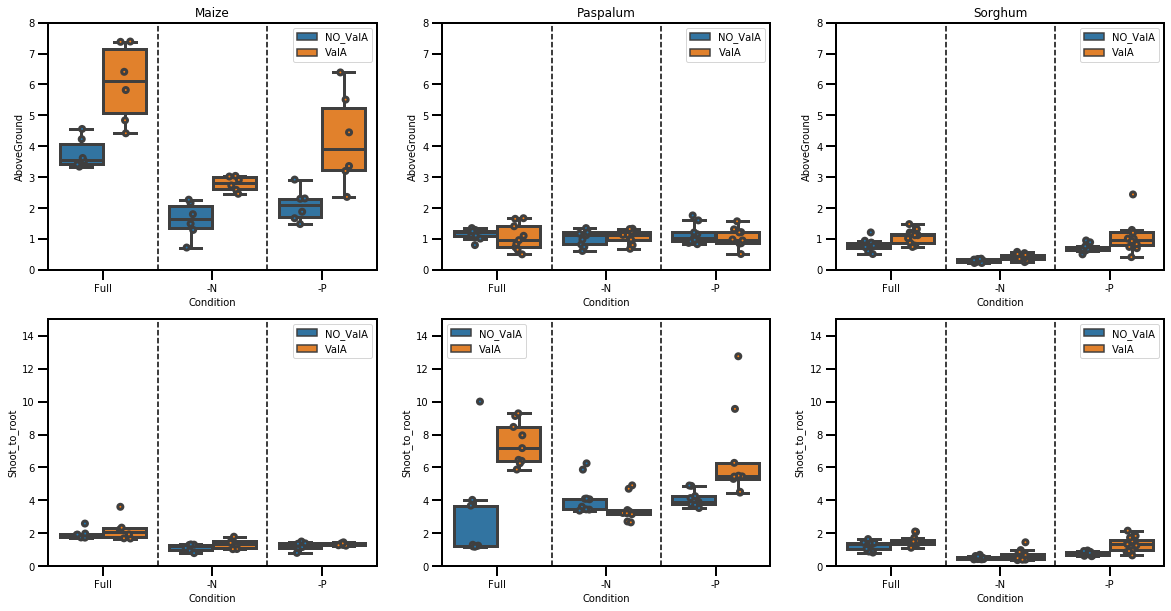

In [87]:
import seaborn as sns
import matplotlib as mpl

dfbiomass = pd.read_csv('Fresh_BioMass_ValA.csv',sep = ',' )
#dfbiomass = pd.read_csv('DryWeight_ValA.csv',sep = ',' )

dfAbove = dfbiomass.drop(labels= ['Root','Shoot_to_root'],axis=1)
dfRoot = dfbiomass.drop(labels=['AboveGround','Shoot_to_root'],axis=1)
dfSR = dfbiomass.drop(labels=['Root','AboveGround'],axis=1)
GroupAbove = dfAbove.groupby('Species')
GroupRoot = dfRoot.groupby('Species')
GroupSR = dfSR.groupby('Species')

fig, axes = plt.subplots(2,3,figsize=(20,10))

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.family']=['sans-serif']
for i,g in enumerate(GroupAbove):
    ax = axes[0,i]
    Species = list(set(g[1]['Species']))[0]
    print(Species)
    sns.boxplot(x="Condition",  y="AboveGround", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="AboveGround", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,2.5)
    #ax.set_ylim(0,1) #for dry weight
    ax.set_ylim(0,8) #for fresh weight
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    ax.axvline(1.5,color='black',linestyle= '--', linewidth=1.5)
    ax.set_title(Species)
    dfGroupAbove = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['Full'].AboveGround.values
    N_dep_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['-N'].AboveGround.values
    P_dep_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['-P'].AboveGround.values
    Full_ValA = dfGroupAbove.loc['ValA'].loc['Full'].AboveGround.values
    N_dep_ValA = dfGroupAbove.loc['ValA'].loc['-N'].AboveGround.values
    P_dep_ValA = dfGroupAbove.loc['ValA'].loc['-P'].AboveGround.values
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
    tPdep = ttest_ind(P_dep_NO_ValA,P_dep_ValA)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])
    
for i,g in enumerate(GroupSR):
    ax = axes[1,i]
    Species = list(set(g[1]['Species']))[0]
    print(Species)
    sns.boxplot(x="Condition",  y="Shoot_to_root", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="Shoot_to_root", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(0,15)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    ax.axvline(1.5,color='black',linestyle= '--', linewidth=1.5)
    
    dfGroupSR = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupSR.loc['NO_ValA'].loc['Full'].Shoot_to_root.values
    N_dep_NO_ValA = dfGroupSR.loc['NO_ValA'].loc['-N'].Shoot_to_root.values
    P_dep_NO_ValA = dfGroupSR.loc['NO_ValA'].loc['-P'].Shoot_to_root.values
    Full_ValA = dfGroupSR.loc['ValA'].loc['Full'].Shoot_to_root.values
    N_dep_ValA = dfGroupSR.loc['ValA'].loc['-N'].Shoot_to_root.values
    P_dep_ValA = dfGroupSR.loc['ValA'].loc['-P'].Shoot_to_root.values
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
    tPdep = ttest_ind(P_dep_NO_ValA,P_dep_ValA)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])
    
    

plt.savefig('ValidamycinA_FreshWeight.svg')

#plt.savefig('ValidamycinA_DryWeight.svg')
    
''' 
for i,g in enumerate(GroupRoot):
    ax = axes[1,i]
    Species = list(set(g[1]['Species']))[0]
    print(Species)
    sns.boxplot(x="Condition",  y="Root", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="Root", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(0,1)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    ax.axvline(1.5,color='black',linestyle= '--', linewidth=1.5)
    
    dfGroupRoot = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupRoot.loc['NO_ValA'].loc['Full'].Root.values
    N_dep_NO_ValA = dfGroupRoot.loc['NO_ValA'].loc['-N'].Root.values
    P_dep_NO_ValA = dfGroupRoot.loc['NO_ValA'].loc['-P'].Root.values
    Full_ValA = dfGroupRoot.loc['ValA'].loc['Full'].Root.values
    N_dep_ValA = dfGroupRoot.loc['ValA'].loc['-N'].Root.values
    P_dep_ValA = dfGroupRoot.loc['ValA'].loc['-P'].Root.values
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
    tPdep = ttest_ind(P_dep_NO_ValA,P_dep_ValA)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])
    
    axes[0].plot([-0.2,0.2], [7.8, 7.8], linewidth=2.5, solid_joinstyle = 'miter', color='k')
    axes[0].plot([-0.2,-0.2], [7.7, 7.8], linewidth=2.5, solid_joinstyle = 'miter', color='k')
    axes[0].plot([0.2,0.2], [7.7, 7.8], linewidth=2.5, solid_joinstyle = 'miter', color='k')
    
    axes[0].plot([0.8,1.2], [4.0, 4.0], linewidth=2.5, solid_joinstyle = 'miter', color='k')
    axes[0].plot([0.8,0.8], [3.9, 4.0], linewidth=2.5, solid_joinstyle = 'miter', color='k')
    axes[0].plot([1.2,1.2], [3.9, 4.0], linewidth=2.5, solid_joinstyle = 'miter', color='k')

    axes[0].plot([1.8,2.2], [4.2, 4.2], linewidth=2.5, solid_joinstyle = 'miter', color='k')
    axes[0].plot([1.8,1.8], [4.1, 4.2], linewidth=2.5, solid_joinstyle = 'miter', color='k')
    axes[0].plot([2.2,2.2], [4.1, 4.2], linewidth=2.5, solid_joinstyle = 'miter', color='k')
#plot vertical ticks for the bars
    dfGroupAbove = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['Full'].AboveGround.values
    N_dep_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['-N'].AboveGround.values
    P_dep_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['-P'].AboveGround.values
    Full_ValA = dfGroupAbove.loc['ValA'].loc['Full'].AboveGround.values
    N_dep_ValA = dfGroupAbove.loc['ValA'].loc['-N'].AboveGround.values
    P_dep_ValA = dfGroupAbove.loc['ValA'].loc['-P'].AboveGround.values
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
    tPdep = ttest_ind(P_dep_NO_ValA,P_dep_ValA)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])
'''



  Condition Species  AboveGround  Root  Shoot_to_root  WholePlant Treatment
0      Full   Maize         0.35  0.17           2.06        0.52   NO_ValA
1      Full   Maize         0.37  0.17           2.18        0.54   NO_ValA
2      Full   Maize         0.43  0.18           2.39        0.61   NO_ValA
3      Full   Maize         0.40  0.20           2.00        0.60   NO_ValA
4      Full   Maize         0.41  0.18           2.28        0.59   NO_ValA
Maize
Maize Full: 0.0010015384413489443
Maize N_dep: 0.005401510807259953
Paspalum
Paspalum Full: 0.5797925492117992
Paspalum N_dep: 0.7268104642853929
Sorghum
Sorghum Full: 0.05159152993360972
Sorghum N_dep: 0.0054228919211681565
Maize
Maize Full: 0.018253273978698727
Maize N_dep: 0.030762153832464268
Paspalum
Paspalum Full: 0.07585961169297739
Paspalum N_dep: 0.4821484288387319
Sorghum
Sorghum Full: 0.01939150985260813
Sorghum N_dep: 0.004012601393260819


'\nfor i,g in enumerate(GroupRoot):\n    ax = axes[1,i]\n    Species = list(set(g[1][\'Species\']))[0]\n    print(Species)\n    sns.boxplot(x="Condition",  y="Root", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)\n    sns.stripplot(x="Condition", y="Root", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)\n    \n    handles, labels = ax.get_legend_handles_labels()\n    l = ax.legend(handles[:2], labels[:2])\n    \n    ax.set_xlim(-0.5,1.5)\n    ax.set_ylim(0,10)\n    ax.axvline(0.5,color=\'black\',linestyle= \'--\', linewidth=1.5)\n    \n    dfGroupRoot = g[1].set_index([\'Treatment\',\'Condition\'])\n    Full_NO_ValA = dfGroupRoot.loc[\'NO_ValA\'].loc[\'Full\'].Root.values\n    N_dep_NO_ValA = dfGroupRoot.loc[\'NO_ValA\'].loc[\'-N\'].Root.values\n    \n    Full_ValA = dfGroupRoot.loc[\'ValA\'].loc[\'Full\'].Root.values\n    N_dep_ValA = dfGroupRoot.loc[\'ValA\'].loc[\'-N\'].Root.values\n   \n    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)\n    tNdep = tt

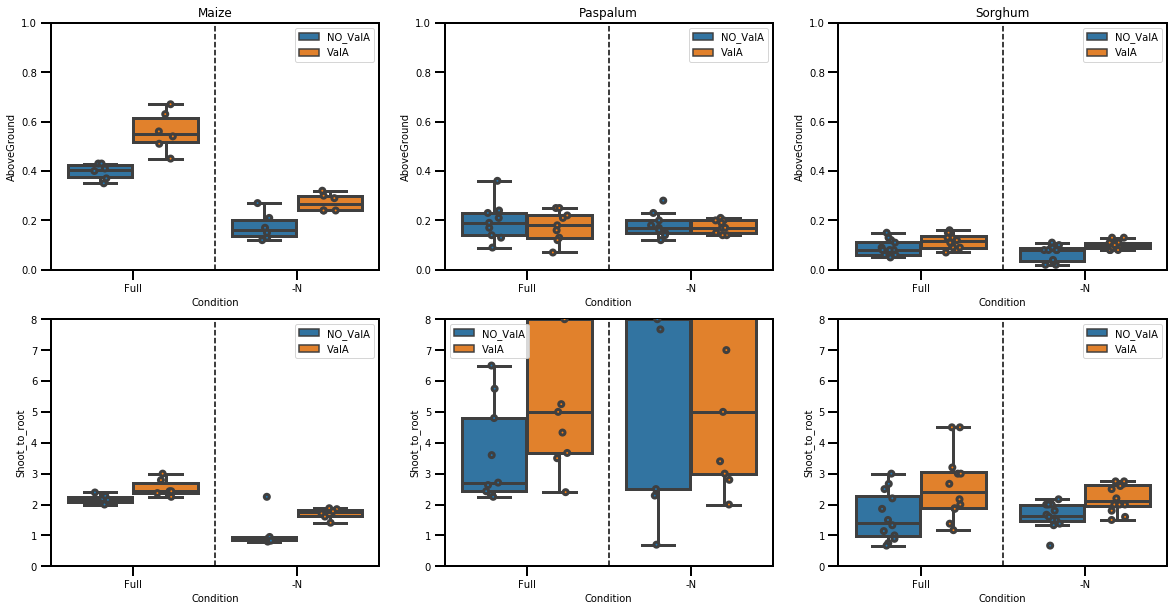

In [73]:
import seaborn as sns
import matplotlib as mpl

#dfbiomass = pd.read_csv('Fresh_BioMass_ValA.csv',sep = ',' )
dfbiomass = pd.read_csv('DryWeight_ValA.csv',sep=',')
dfbiomass = dfbiomass.set_index('Condition').loc[['Full','-N']]
dfbiomass.reset_index(inplace=True)
#dfbiomass
print(dfbiomass.head())
dfAbove = dfbiomass.drop(labels= ['Root','Shoot_to_root'],axis=1)
dfRoot = dfbiomass.drop(labels=['AboveGround','Shoot_to_root'],axis=1)
dfSR = dfbiomass.drop(labels=['Root','AboveGround'],axis=1)
GroupAbove = dfAbove.groupby('Species')
GroupRoot = dfRoot.groupby('Species')
GroupSR = dfSR.groupby('Species')

fig, axes = plt.subplots(2,3,figsize=(20,10))

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.family']=['sans-serif']
for i,g in enumerate(GroupAbove):
    ax = axes[0,i]
    Species = list(set(g[1]['Species']))[0]
    print(Species)
    df=g[1]
    sns.boxplot(x="Condition",  y="AboveGround", hue="Treatment", data=df, dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="AboveGround", hue="Treatment", data=df, dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(0,1)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    
    ax.set_title(Species)
    dfGroupAbove = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['Full'].AboveGround.values
    N_dep_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['-N'].AboveGround.values

    Full_ValA = dfGroupAbove.loc['ValA'].loc['Full'].AboveGround.values
    N_dep_ValA = dfGroupAbove.loc['ValA'].loc['-N'].AboveGround.values
   
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)

    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])


for i,g in enumerate(GroupSR):
    ax = axes[1,i]
    Species = g[0]
    print(Species)
    df=g[1]
    #df['Shoot_to_root']=np.log10(g[1]['Shoot_to_root'])
    sns.boxplot(x="Condition",  y="Shoot_to_root", hue="Treatment", data=df, dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="Shoot_to_root", hue="Treatment", data=df, dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(0,8)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    
    dfGroupSR = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupSR.loc['NO_ValA'].loc['Full'].Shoot_to_root.values
    N_dep_NO_ValA = dfGroupSR.loc['NO_ValA'].loc['-N'].Shoot_to_root.values
    
    Full_ValA = dfGroupSR.loc['ValA'].loc['Full'].Shoot_to_root.values
    N_dep_ValA = dfGroupSR.loc['ValA'].loc['-N'].Shoot_to_root.values
    
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
    
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
#plt.savefig('FreshWeighValA_1.svg')
plt.savefig('DryWeighValA_1.svg')

'''
for i,g in enumerate(GroupRoot):
    ax = axes[1,i]
    Species = list(set(g[1]['Species']))[0]
    print(Species)
    sns.boxplot(x="Condition",  y="Root", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="Root", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,1.5)
    ax.set_ylim(0,10)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    
    dfGroupRoot = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupRoot.loc['NO_ValA'].loc['Full'].Root.values
    N_dep_NO_ValA = dfGroupRoot.loc['NO_ValA'].loc['-N'].Root.values
    
    Full_ValA = dfGroupRoot.loc['ValA'].loc['Full'].Root.values
    N_dep_ValA = dfGroupRoot.loc['ValA'].loc['-N'].Root.values
   
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
   
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
   
'''

In [71]:
-np.log10(g[1]['AboveGround'])

KeyError: 'AboveGround'

In [56]:
#dfbiomass = dfbiomass.set_index('Condition').loc[['Full','-N']]
dfbiomass.reset_index(inplace=True)
dfbiomass

,Condition,Species,AboveGround,Root,Shoot_to_root,Treatment
0,Full,Maize,4.23,1.63,2.60,NO_ValA
1,Full,Maize,3.34,1.75,1.91,NO_ValA
2,Full,Maize,3.52,2.01,1.75,NO_ValA
3,Full,Maize,4.56,2.62,1.74,NO_ValA
4,Full,Maize,3.62,1.82,1.99,NO_ValA
...,...,...,...,...,...,...
121,-N,Sorghum,1.02,0.84,1.21,ValA
122,-N,Sorghum,1.21,0.92,1.32,ValA
123,-N,Sorghum,0.99,0.89,1.11,ValA
124,-N,Maize,1.02,1.15,0.89,NO_ValA


Maize
Maize Full: 0.0010015384413489443
Maize N_dep: 0.005401510807259953
Maize P_dep: 0.005185421681687084
Paspalum
Paspalum Full: 0.5797925492117992
Paspalum N_dep: 0.7268104642853929
Paspalum P_dep: 0.76770543030894
Sorghum
Sorghum Full: 0.22421255307742066
Sorghum N_dep: 0.0054228919211681565
Sorghum P_dep: 0.22031305454744515
Maize
Maize Full: 0.004053993931808626
Maize N_dep: 0.6309137847691931
Maize P_dep: 0.06948576444991361
Paspalum
Paspalum Full: 0.02219960536042327
Paspalum N_dep: 0.53472463909792
Paspalum P_dep: 0.7427812263093245
Sorghum
Sorghum Full: 0.17110947046595365
Sorghum N_dep: 0.8001274870253067
Sorghum P_dep: 0.15043296401630735
Maize
Maize Full: 0.018253273978698727
Maize N_dep: 0.030762153832464268
Maize P_dep: 0.002635623927937283
Paspalum
Paspalum Full: 0.07585961169297739
Paspalum N_dep: 0.4821484288387319
Paspalum P_dep: 0.8949515475211175
Sorghum
Sorghum Full: 0.060007837435042614
Sorghum N_dep: 0.004012601393260819
Sorghum P_dep: 0.027933354994074937


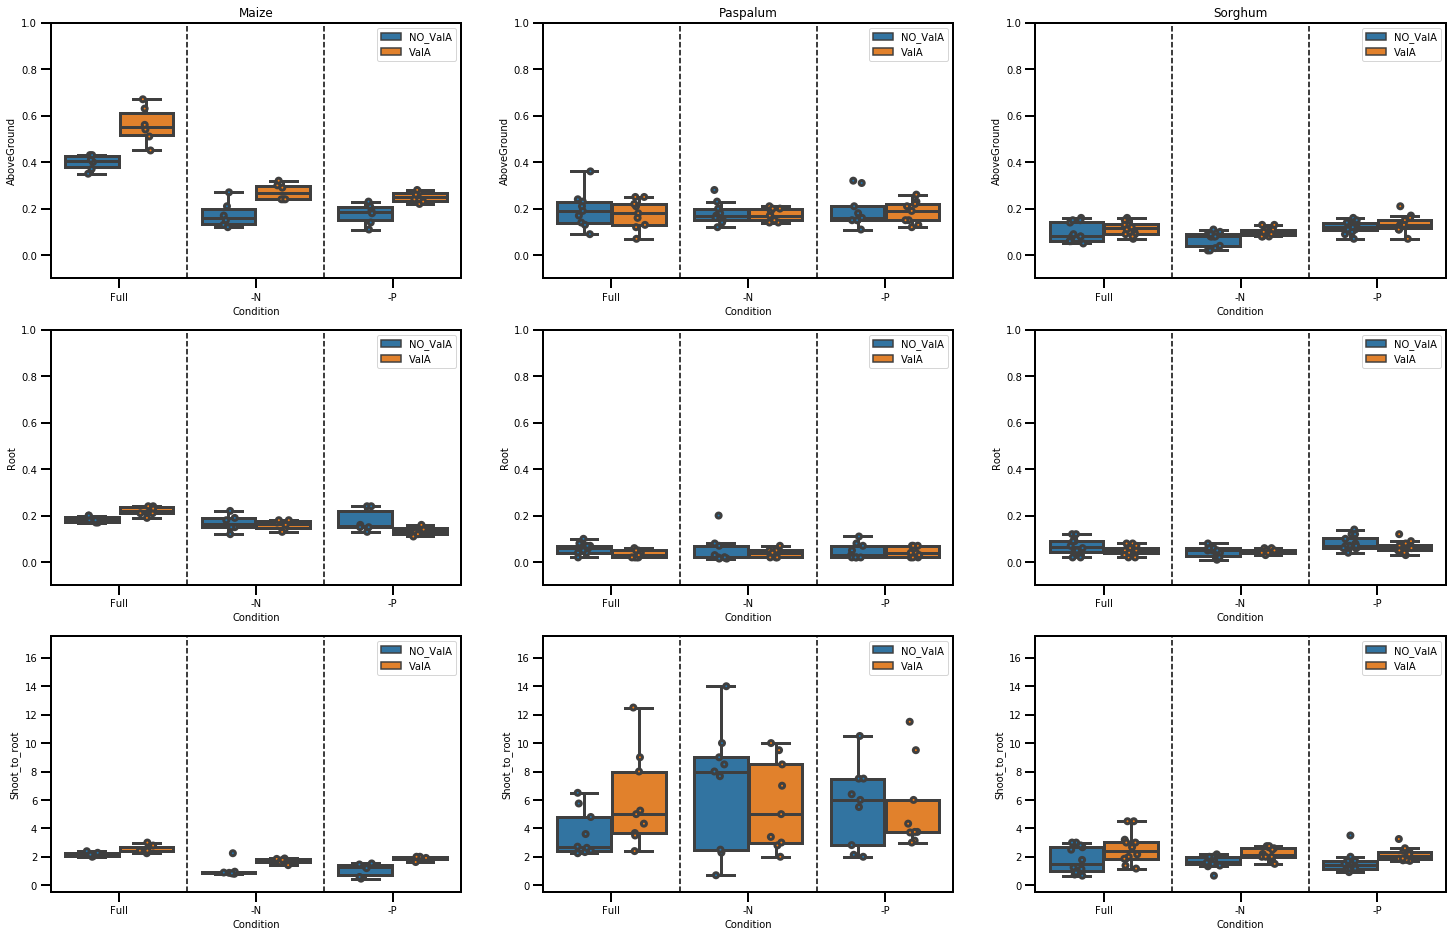

In [66]:
import seaborn as sns
import matplotlib as mpl

dfdrymass = pd.read_csv('DryWeight_ValA.csv',sep = ',' )
header = ['Condition', 'Species', 'AboveGround', 'Root', 'Shoot_to_root', 'WholePlant', 'Treatment']

dfAbove = dfdrymass[['Condition', 'Species', 'AboveGround','Treatment']]
dfRoot = dfdrymass[['Condition', 'Species', 'Root','Treatment']]
dfSR = dfdrymass[['Condition', 'Species',  'Shoot_to_root', 'Treatment']]

GroupAbove = dfAbove.groupby('Species')
GroupRoot = dfRoot.groupby('Species')
GroupSR = dfSR.groupby('Species')                
                                 
fig, axes = plt.subplots(3,3,figsize=(25,16))

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.family']=['sans-serif']
for i,g in enumerate(GroupAbove):
    ax = axes[0,i]
    Species = list(set(g[1]['Species']))[0]
    print(Species)
    sns.boxplot(x="Condition",  y="AboveGround", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="AboveGround", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(-0.1,1)
    ax.set_title(Species)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    ax.axvline(1.5,color='black',linestyle= '--', linewidth=1.5)
    
    dfGroupAbove = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['Full'].AboveGround.values
    N_dep_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['-N'].AboveGround.values
    P_dep_NO_ValA = dfGroupAbove.loc['NO_ValA'].loc['-P'].AboveGround.values
    Full_ValA = dfGroupAbove.loc['ValA'].loc['Full'].AboveGround.values
    N_dep_ValA = dfGroupAbove.loc['ValA'].loc['-N'].AboveGround.values
    P_dep_ValA = dfGroupAbove.loc['ValA'].loc['-P'].AboveGround.values
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
    tPdep = ttest_ind(P_dep_NO_ValA,P_dep_ValA)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])
    
for i,g in enumerate(GroupRoot):
    ax = axes[1,i]
    Species = list(set(g[1]['Species']))[0]
    print(Species)
    sns.boxplot(x="Condition",  y="Root", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="Root", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(-0.1,1)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    ax.axvline(1.5,color='black',linestyle= '--', linewidth=1.5)
    
    dfGroupRoot = g[1].set_index(['Treatment','Condition'])
    Full_NO_ValA = dfGroupRoot.loc['NO_ValA'].loc['Full'].Root.values
    N_dep_NO_ValA = dfGroupRoot.loc['NO_ValA'].loc['-N'].Root.values
    P_dep_NO_ValA = dfGroupRoot.loc['NO_ValA'].loc['-P'].Root.values
    Full_ValA = dfGroupRoot.loc['ValA'].loc['Full'].Root.values
    N_dep_ValA = dfGroupRoot.loc['ValA'].loc['-N'].Root.values
    P_dep_ValA = dfGroupRoot.loc['ValA'].loc['-P'].Root.values
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
    tPdep = ttest_ind(P_dep_NO_ValA,P_dep_ValA)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])
    
for i,g in enumerate(GroupSR):
    ax = axes[2,i]
    Species = list(set(g[1]['Species']))[0]
    print(Species)
    sns.boxplot(x="Condition",  y="Shoot_to_root", hue="Treatment", data=g[1], dodge=True, fliersize=0,linewidth=3,ax=ax)
    sns.stripplot(x="Condition", y="Shoot_to_root", hue="Treatment", data=g[1], dodge=True,linewidth=3, ax=ax)
    
    handles, labels = ax.get_legend_handles_labels()
    l = ax.legend(handles[:2], labels[:2])
    
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(-0.5,17.5)
    ax.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
    ax.axvline(1.5,color='black',linestyle= '--', linewidth=1.5)
    
    dfGroupSR = g[1].set_index(['Treatment','Condition'])
    
    Full_NO_ValA = dfGroupSR.loc['NO_ValA'].loc['Full'].Shoot_to_root.values
    Full_ValA = dfGroupSR.loc['ValA'].loc['Full'].Shoot_to_root.values
    
    N_dep_NO_ValA = dfGroupSR.loc['NO_ValA'].loc['-N'].Shoot_to_root.values 
    N_dep_ValA = dfGroupSR.loc['ValA'].loc['-N'].Shoot_to_root.values
    
    P_dep_NO_ValA = dfGroupSR.loc['NO_ValA'].loc['-P'].Shoot_to_root.values
    P_dep_ValA = dfGroupSR.loc['ValA'].loc['-P'].Shoot_to_root.values
    
    tFULL = ttest_ind(Full_NO_ValA,Full_ValA)
    tNdep = ttest_ind(N_dep_NO_ValA,N_dep_ValA)
    tPdep = ttest_ind(P_dep_NO_ValA,P_dep_ValA)
    #tFP_ValA = ttest_ind(Full_ValA,P_dep_ValA)
    print(Species,'Full:', tFULL[1])
    print(Species,'N_dep:', tNdep[1])
    print(Species,'P_dep:', tPdep[1])
    
plt.savefig('ValidamycinA_DryWeight.svg')    

In [65]:
list(dfbiomass)

['Condition',
 'Species',
 'AboveGround',
 'Root',
 'Shoot_to_root',
 'WholePlant',
 'Treatment']

In [26]:
P_dep_NO_ValA=dfGroupRoot.loc['NO_ValA'].loc['-P'].Shoot_to_root.values
P_dep_ValA=dfGroupRoot.loc['ValA'].loc['-P'].Shoot_to_root.values

In [27]:

ttest_ind(P_dep_NO_ValA,P_dep_ValA)

Ttest_indResult(statistic=-2.006878848589076, pvalue=0.05720584643188799)

/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


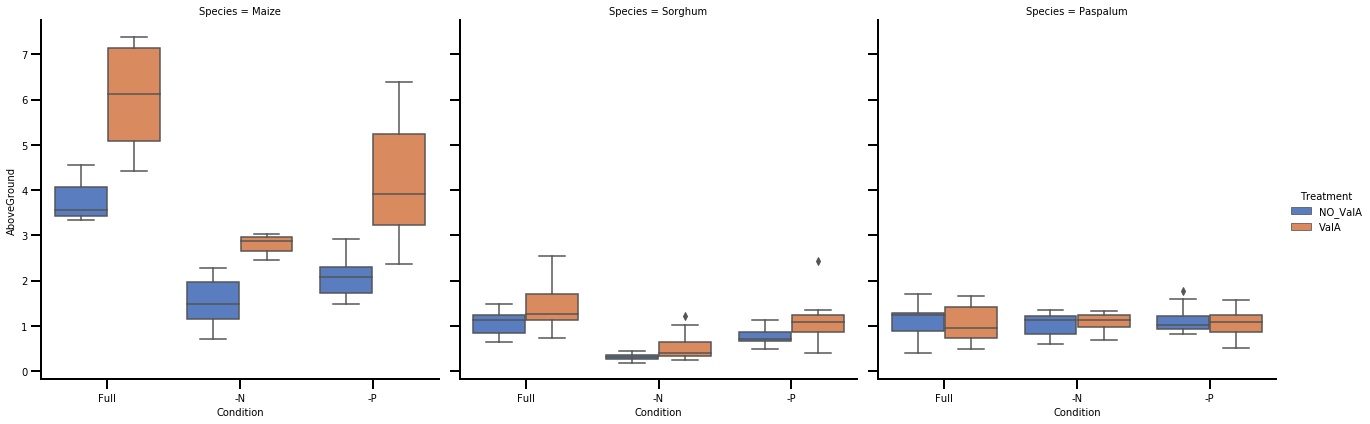

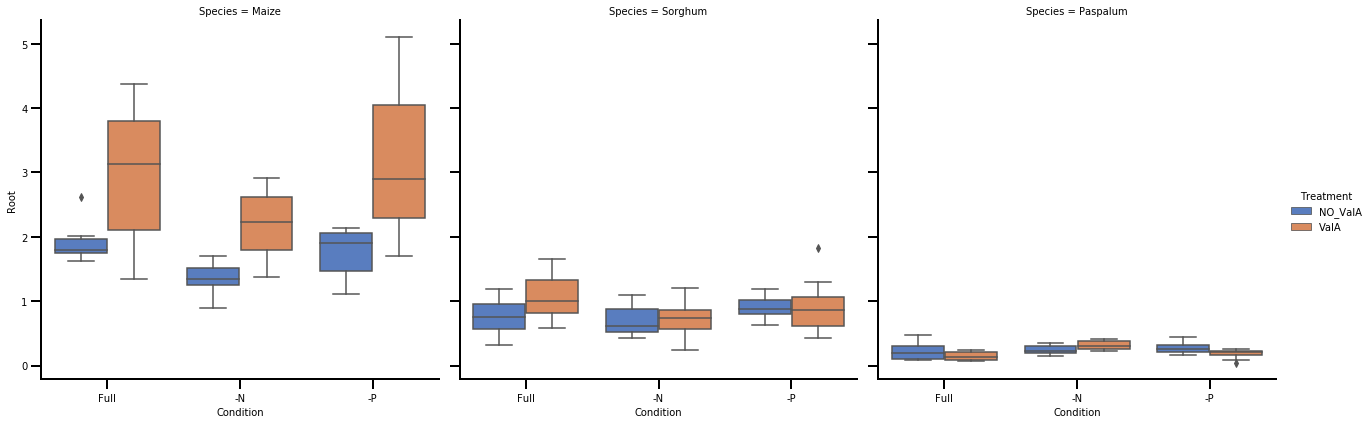

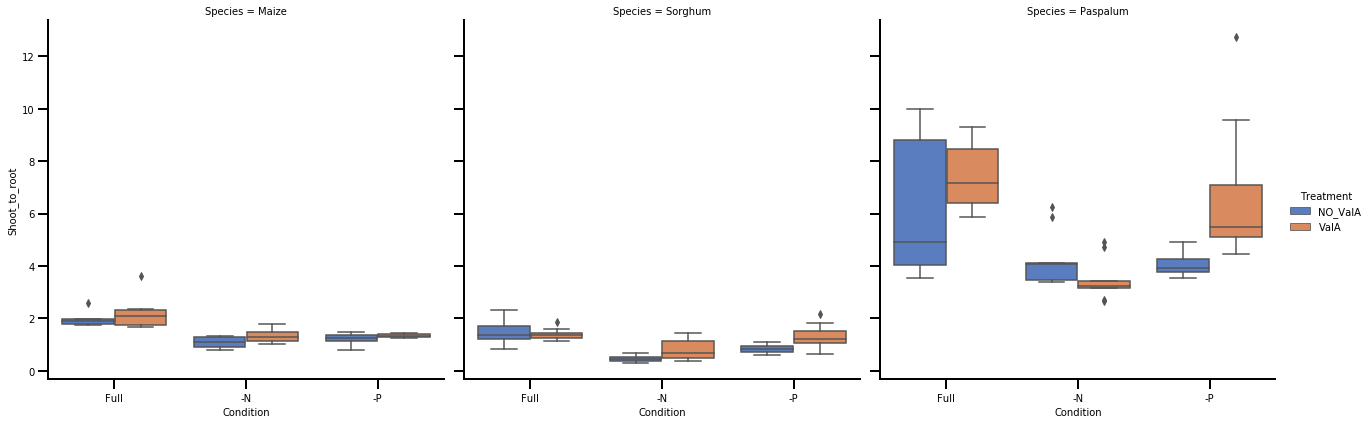

In [60]:
dfbiomass = pd.read_csv('Fresh_BioMass_ValA.csv',sep = ',')
#dfbiomass.columns = ['Species','Biomass','Condition','ValA']
group = dfbiomass.groupby('Species')
#fig, axes = plt.subplots(1,3,figsize=(36,10))
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.family']=['sans-serif']

#sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind="bar", palette="muted", ax=axes[i])
sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted", ax=axes[i])
sns.catplot(x="Condition", y="Root", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted", ax=axes[i])
sns.catplot(x="Condition", y="Shoot_to_root", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted", ax=axes[i])
plt.savefig('ValidamycinA_FreshWeight_Violin.png')

  Species  AboveGround  Root  Shoot_to_root  WholePlant Condition Treatment
0   Maize         0.35  0.17           2.06        0.52      Full   NO_ValA
1   Maize         0.37  0.17           2.18        0.54      Full   NO_ValA
2   Maize         0.43  0.18           2.39        0.61      Full   NO_ValA
3   Maize         0.40  0.20           2.00        0.60      Full   NO_ValA
4   Maize         0.41  0.18           2.28        0.59      Full   NO_ValA


/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
/home/gsun2unl/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


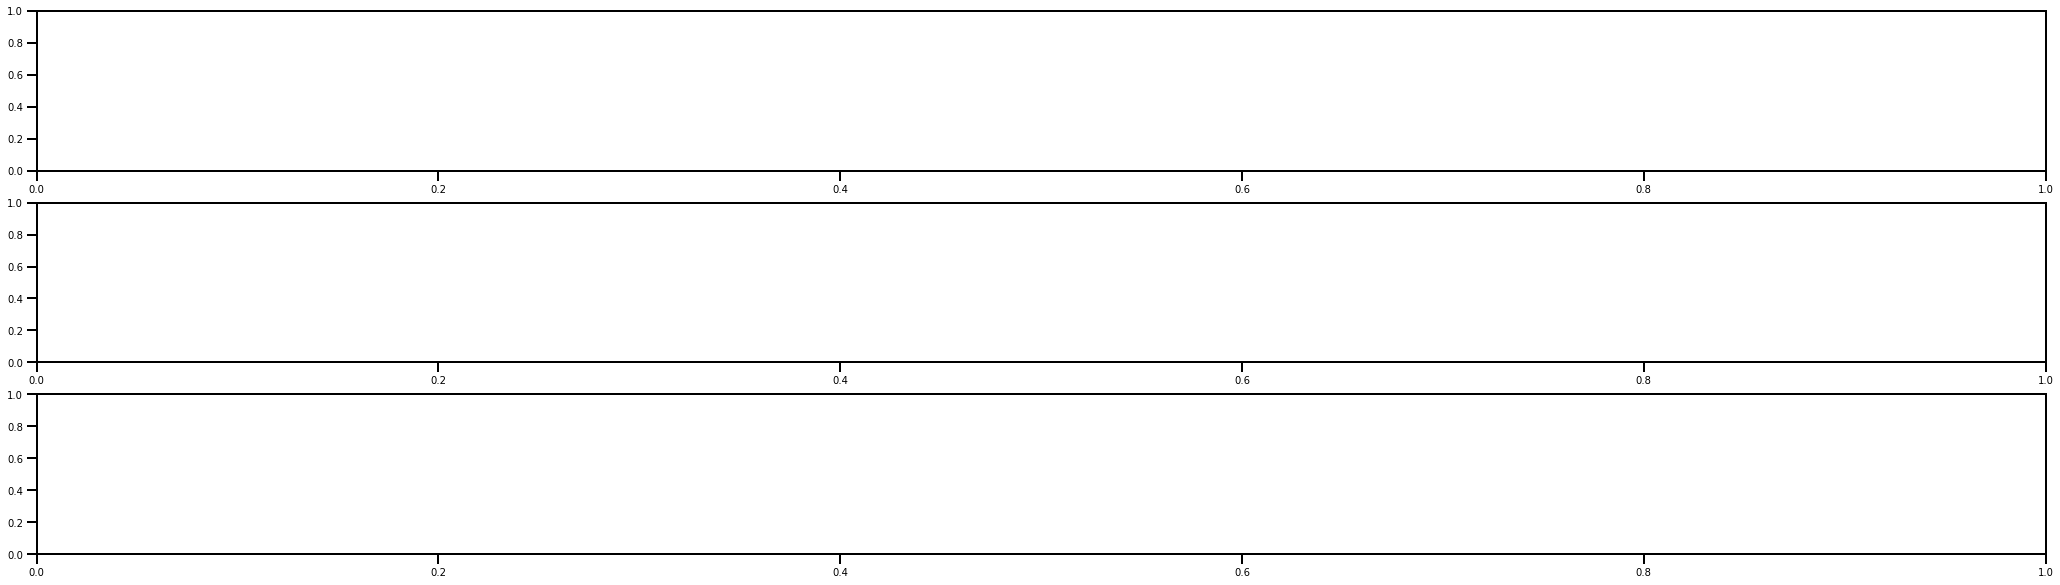

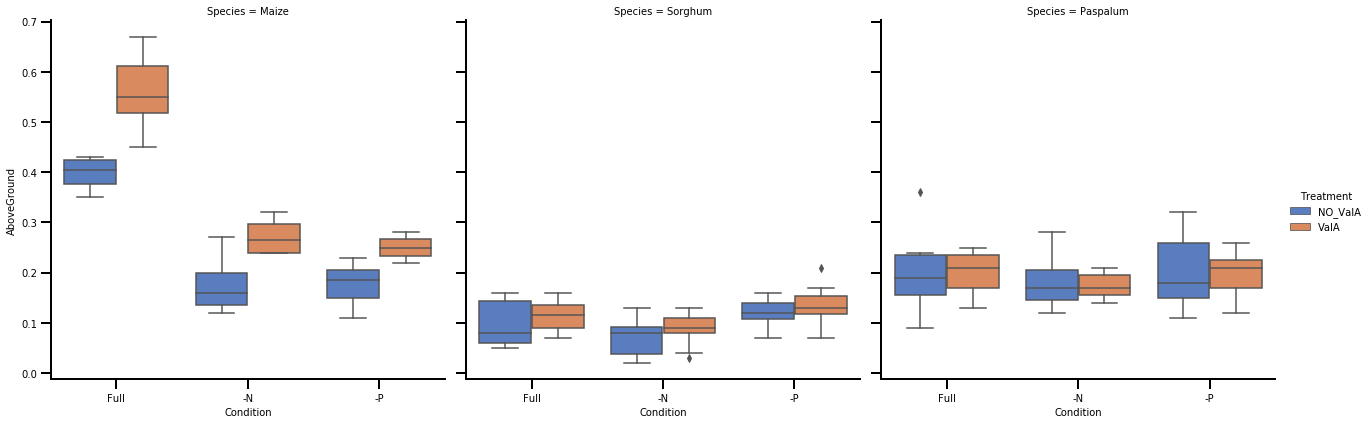

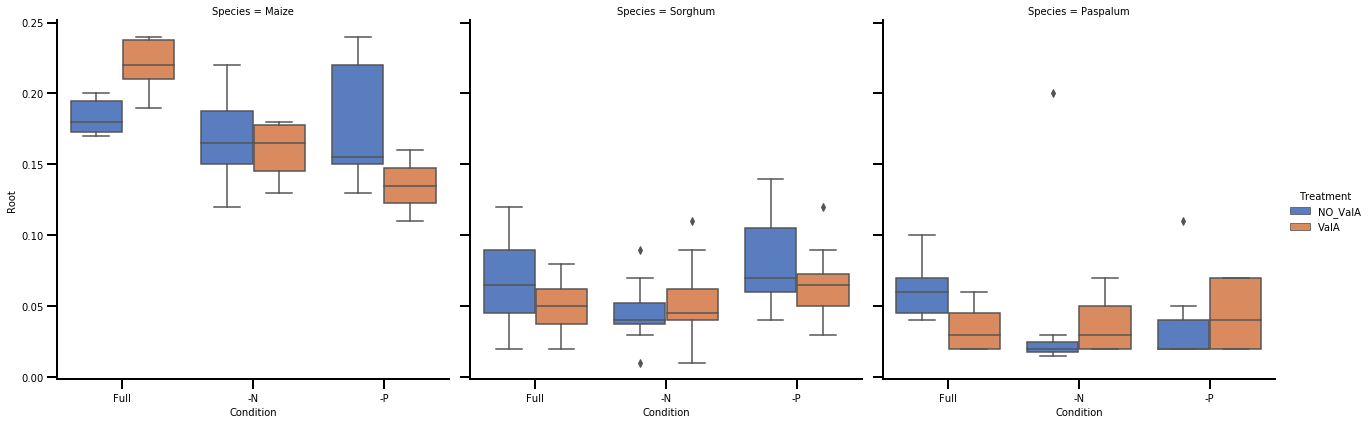

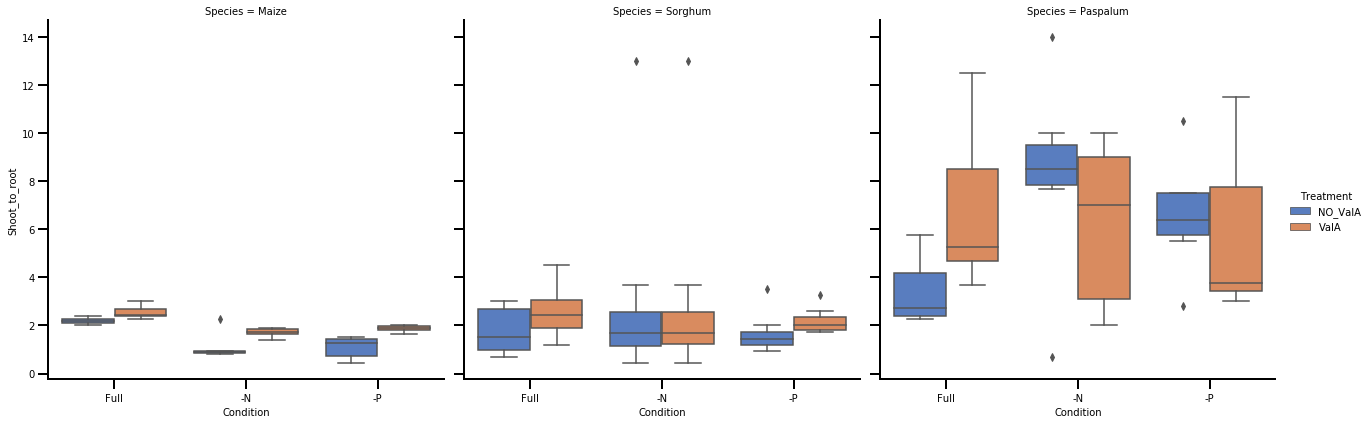

In [12]:
dfbiomass = pd.read_csv('DryWeight_ValA.csv',sep = ',')
print(dfbiomass.head())
#dfbiomass.columns = ['Species','Biomass','Condition','ValA']
#group = dfbiomass.groupby('Species')
fig, axes = plt.subplots(3,1,figsize=(36,10))
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.family']=['sans-serif']

#sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind="bar", palette="muted", ax=axes[i])
sns.catplot(x="Condition", y="AboveGround", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted", ax=axes[0])
sns.catplot(x="Condition", y="Root", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted", ax=axes[1])
sns.catplot(x="Condition", y="Shoot_to_root", hue="Treatment", col = 'Species', data=dfbiomass, height=6, kind='box',palette="muted", ax=axes[2])
#plt.savefig('ValidamycinA_DryWeight_Violin.png')

In [152]:
dfDIRT = pd.read_csv('DIRT.csv',sep='\t')
dfDIRT

,Species,Value,Measurements,Condition
0,B73,17.305700,AREA,-N
1,B73,39.792900,AREA,-N
2,B73,26.465700,AREA,-N
3,B73,54.568600,AREA,-P
4,B73,70.937500,AREA,-P
5,B73,64.352500,AREA,-P
6,B73,72.235500,AREA,Full
7,B73,33.833300,AREA,Full
8,B73,35.021500,AREA,Full
9,Paspalum,17.790700,AREA,-N


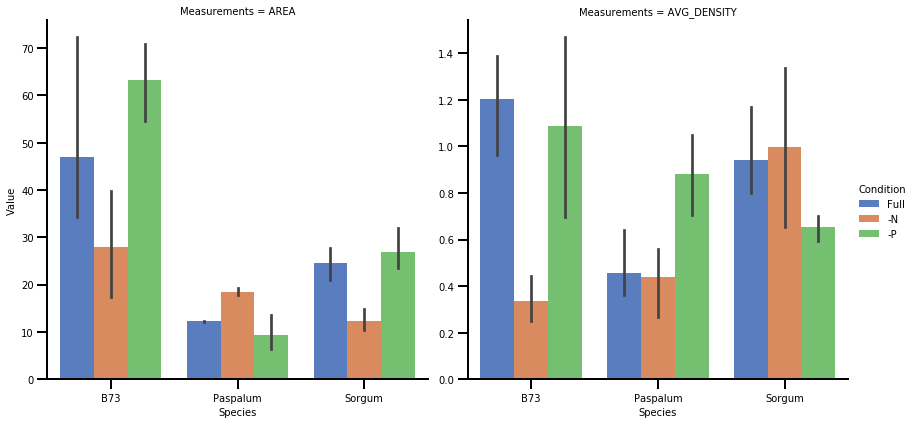

In [159]:

sns.catplot(x="Species", y="Value", hue="Condition", hue_order=['Full','-N','-P'], col = 'Measurements',data=dfDIRT, height=6, kind="bar", palette="muted", sharey=False)
#sns.catplot(x="IMAGE_NAME", y="AVG_DENSITY", hue="Condition", hue_order=['Full','-N','-P'],data=dfDIRT, height=6, kind="bar", palette="muted")
plt.savefig('DIRT.svg')

In [4]:
dfbiomass = pd.read_csv('biomass_aboveGround.csv',sep = '\t', header=None )
dfbiomass.columns = ['Species','Weight','Condition']
header = ['Species','Condition','Mean','STD','test_pvalue']
dfstat = pd.DataFrame(columns = header)

for aspecies in set(dfbiomass.index):
    DataFull = dfbiomass.loc[aspecies]['Full']
    meanFull = DataFull.mean()
    stdFull = DataFull.std()
    rowList = [[aspecies,'Full',meanFull,stdFull,'NA']]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
    DataN = dfbiomass.loc[aspecies]['-N']
    meanN = DataN.mean()
    stdN = DataN.std()
    tFN = ttest_ind(DataFull,DataN)
    DataP = dfbiomass.loc[aspecies]['-P']
    rowList = [[aspecies,'-N',meanN,stdN,tFN[1]]]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
    meanP = DataP.mean()
    stdP = DataP.std()
    tFP = ttest_ind(DataFull,DataP)
    rowList = [[aspecies,'-P',meanP,stdP,tFP[1]]]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
    
dfstat.set_index('Species',inplace=True)

SyntaxError: invalid syntax (<ipython-input-4-9276c421038e>, line 1)

In [4]:
dfbiomass = pd.read_csv('biomass.csv',sep = ',' , header=None)
dfbiomass.columns=['Species','biomass','condition']
dflength = pd.read_csv('RootLength.csv',sep=',')
#dflength.columns=['Species','biomass','condition']

In [5]:
dfbiomass

,Species,biomass,condition
0,Maize,3.84,Full
1,Maize,3.92,Full
2,Maize,4.40,Full
3,Maize,4.90,Full
4,Maize,4.10,Full
5,Danthoniopsis,0.50,Full
6,Danthoniopsis,0.39,Full
7,Danthoniopsis,0.32,Full
8,Danthoniopsis,0.41,Full
9,Sorghum,2.13,Full


In [6]:
dflength

,Species,Length,condition
0,Maize,20.3,Full
1,Maize,25.7,Full
2,Maize,20.4,Full
3,Maize,24.1,Full
4,Maize,24.0,Full
5,Maize,20.3,Full
6,Maize,29.3,Full
7,Maize,17.5,Full
8,Maize,27.3,Full
9,Maize,29.8,Full


In [7]:
dfsub = dfbiomass.set_index('Species').loc[['Maize','Sorghum','Paspalum']]
dfsub.reset_index(inplace=True)
dfsub

,Species,biomass,condition
0,Maize,3.84,Full
1,Maize,3.92,Full
2,Maize,4.40,Full
3,Maize,4.90,Full
4,Maize,4.10,Full
5,Maize,2.64,-N
6,Maize,2.02,-N
7,Maize,2.02,-N
8,Maize,2.30,-N
9,Maize,2.12,-N


In [34]:

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))


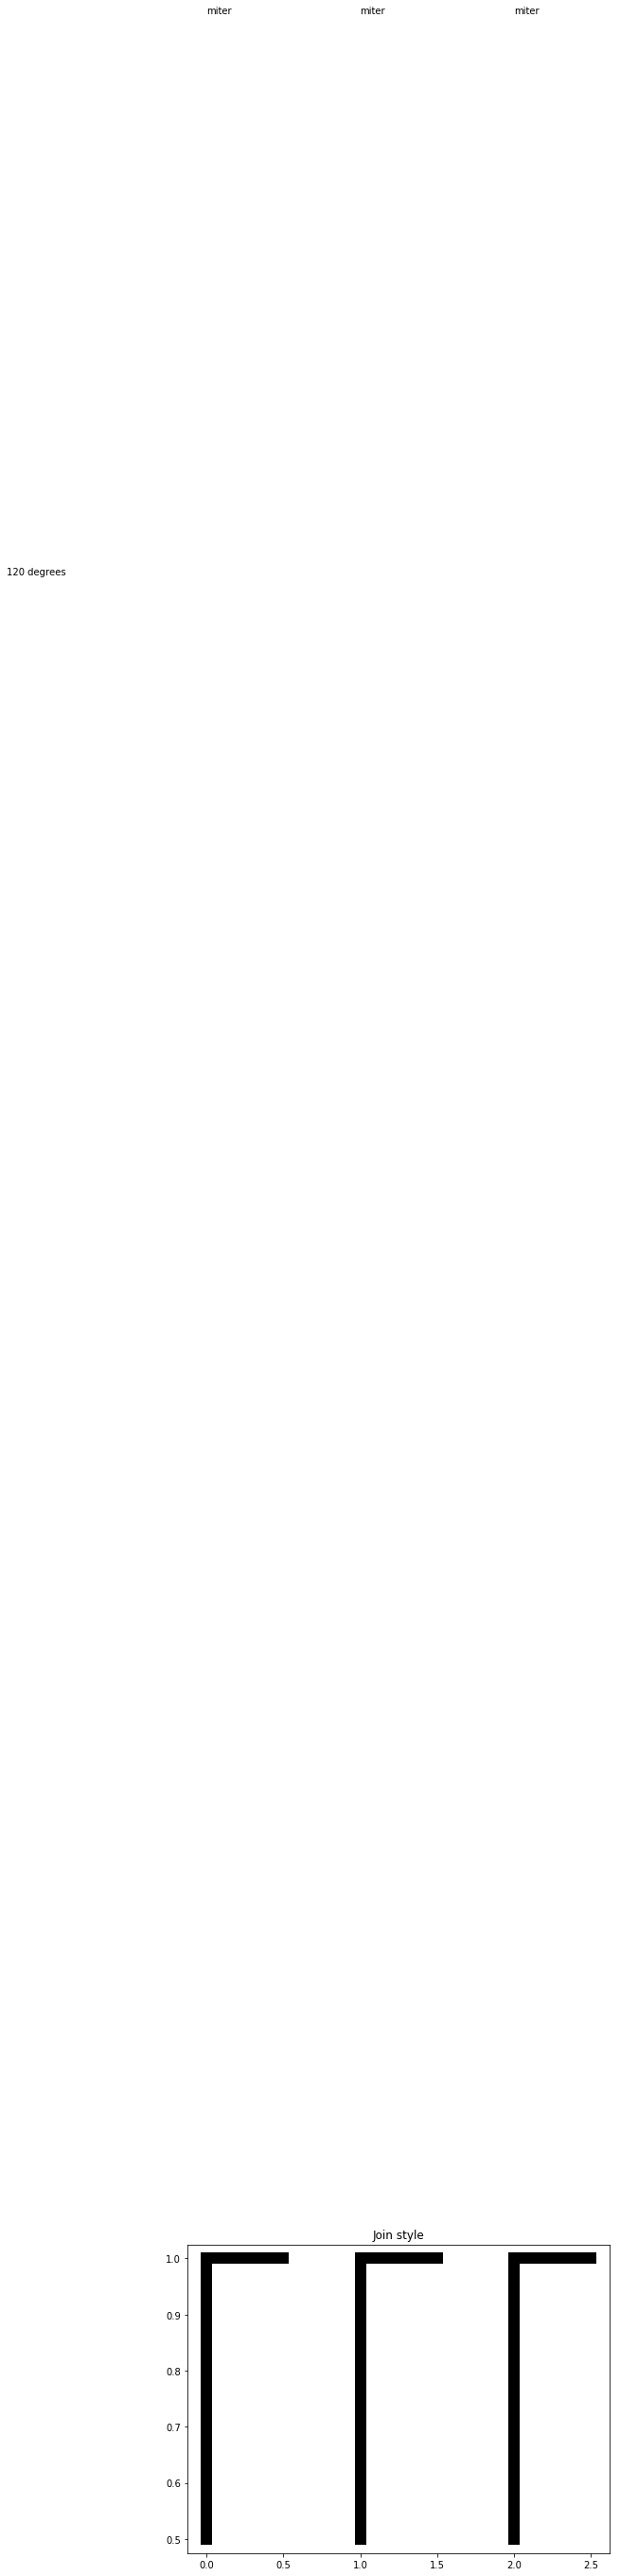

In [47]:
def plot_angle(ax, x, y, angle, style):
    phi = np.radians(angle)
    xx = [x + .5, x, x + .5*np.cos(phi)]
    yy = [y, y, y + .5*np.sin(phi)]
    ax.plot(xx, yy, lw=12, color='k', solid_joinstyle=style)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Join style')
for x, style in enumerate(['miter', 'miter', 'miter']):
    ax.text(x, 5, style)
    plot_angle(ax, x, 1, -90, style)
    if x == 0: ax.text(-1.3, y, f'{angle} degrees')

In [37]:
dflength = pd.read_csv('RootLength.csv',sep=',')
dfsub = dflength.set_index('Species').loc[['Maize','Sorghum','Paspalum']]
dfsub.reset_index(inplace=True)
dfsub

,Species,Length,condition
0,Maize,20.3,Full
1,Maize,25.7,Full
2,Maize,20.4,Full
3,Maize,24.1,Full
4,Maize,24.0,Full
5,Maize,20.3,Full
6,Maize,29.3,Full
7,Maize,17.5,Full
8,Maize,27.3,Full
9,Maize,29.8,Full


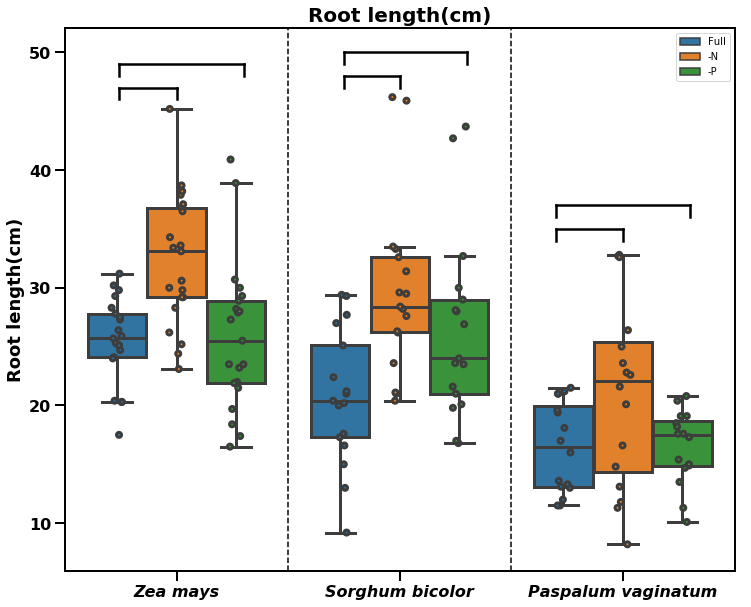

In [43]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['font.family']=['sans-serif']
fig,ax=plt.subplots(figsize=(12,10))
sns.boxplot(x="Species", hue="condition", y="Length", data=dfsub,ax=ax,fliersize=0,linewidth=3)

sns.stripplot(x="Species", y="Length", hue="condition", data=dfsub, jitter=True, dodge=True,linewidth=3, ax=ax)
handles, labels = ax.get_legend_handles_labels()
l = ax.legend(handles[:3], labels[:3])
plt.axvline(0.5,color='black',linestyle= '--', linewidth=1.5)
plt.axvline(1.5,color='black',linestyle= '--', linewidth=1.5)

ax.set_yticklabels([0,10,20,30,40,50],size=16,color='k',fontweight='bold')
ax.set_xticklabels(['Zea mays','Sorghum bicolor','Paspalum vaginatum'],size=16,color='k',fontweight='bold', fontstyle='italic')
ax.set_ylabel('Root length(cm)',size=18, color='black',fontweight='bold')
ax.set_xlabel('')
plt.title('Root length(cm)',size=20,color='k',fontweight='bold')
plt.plot([-0.26,0], [47, 47], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([-0.26,0.3], [49, 49], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.plot([0.75,1.0], [48, 48], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.75,1.3], [50, 50], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.plot([1.7,2.0], [35, 35], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.7,2.3], [37, 37], linewidth=2.5, solid_joinstyle = 'miter', color='k')

#plot vertical ticks for sig bars
plt.plot([-0.26,-0.26], [46, 47], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([-0.26,-0.26], [48, 49], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([0,0], [46, 47], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.3,0.3], [48, 49], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.plot([0.75,0.75], [47, 48], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.75,0.75], [49, 50], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.3,1.3], [49, 50], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.0,1.0], [47, 48], linewidth=2.5, solid_joinstyle = 'miter', color='k')


plt.plot([1.7,1.7], [34, 35], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.7,1.7], [36, 37], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([2.3,2.3], [36, 37], linewidth=2.5, solid_joinstyle = 'miter', color='k')
plt.plot([2.0,2.0], [34, 35], linewidth=2.5, solid_joinstyle = 'miter', color='k')

plt.savefig('RootLength.svg')

In [32]:
dfsub['Condition'] = dfsub.Species.map(str) + dfsub.condition.map(str)
dfsub

,Species,Length,condition,Condition
0,Maize,20.3,Full,MaizeFull
1,Maize,25.7,Full,MaizeFull
2,Maize,20.4,Full,MaizeFull
3,Maize,24.1,Full,MaizeFull
4,Maize,24.0,Full,MaizeFull
5,Maize,20.3,Full,MaizeFull
6,Maize,29.3,Full,MaizeFull
7,Maize,17.5,Full,MaizeFull
8,Maize,27.3,Full,MaizeFull
9,Maize,29.8,Full,MaizeFull


/home/gsun2unl/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


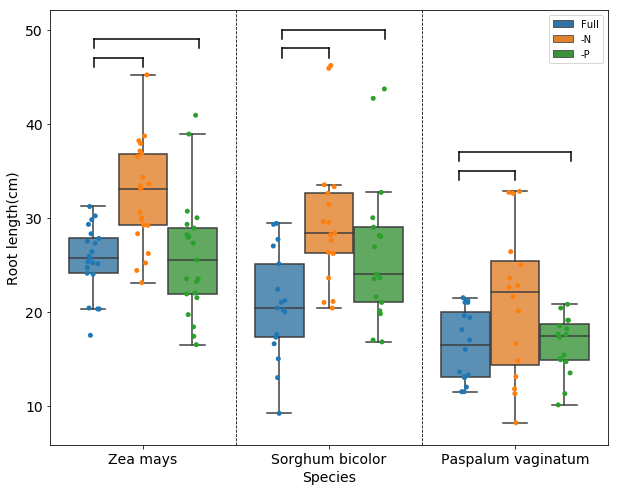

In [35]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(x="Species", hue="condition", y="Length", data=dfsub,ax=ax,fliersize=0)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))
sns.stripplot(x="Species", y="Length", hue="condition", data=dfsub, jitter=True, split=True,ax=ax)
handles, labels = ax.get_legend_handles_labels()
l = ax.legend(handles[:3], labels[:3])
plt.axvline(0.5,color='black',linestyle= '--', linewidth=0.8)
plt.axvline(1.5,color='black',linestyle= '--', linewidth=0.8)
plt.yticks([0,10,20,30,40,50],size=14)
ax.set_xticklabels(['Zea mays','Sorghum bicolor','Paspalum vaginatum'],size=14)
ax.set_ylabel('Root length(cm)',size=14, color='black')
ax.set_xlabel('Species', size = 14, color = 'black')
#plt.title('Biomass comparison across species',size=14)
plt.plot([-0.26,0], [47, 47], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([-0.26,0.3], [49, 49], linewidth=1.5, solid_joinstyle = 'miter', color='k')

plt.plot([0.75,1.0], [48, 48], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.75,1.3], [50, 50], linewidth=1.5, solid_joinstyle = 'miter', color='k')

plt.plot([1.7,2.0], [35, 35], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.7,2.3], [37, 37], linewidth=1.5, solid_joinstyle = 'miter', color='k')

#plot vertical ticks for sig bars
plt.plot([-0.26,-0.26], [46, 47], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([-0.26,-0.26], [48, 49], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([0,0], [46, 47], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.3,0.3], [48, 49], linewidth=1.5, solid_joinstyle = 'miter', color='k')

plt.plot([0.75,0.75], [47, 48], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([0.75,0.75], [49, 50], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.3,1.3], [49, 50], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.0,1.0], [47, 48], linewidth=1.5, solid_joinstyle = 'miter', color='k')


plt.plot([1.7,1.7], [34, 35], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([1.7,1.7], [36, 37], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([2.3,2.3], [36, 37], linewidth=1.5, solid_joinstyle = 'miter', color='k')
plt.plot([2.0,2.0], [34, 35], linewidth=1.5, solid_joinstyle = 'miter', color='k')

plt.savefig('RootLength.svg')
#plt.savefig('RootLength.png',dpi=100)

In [41]:
import matplotlib
matplotlib.font_manager.FontManager()

In [ ]:
plt.plot(x, y,
         linewidth=2.0,
         linestyle='+',
         color='b',
         alpha=0.5,
         marker='o')


 

In [ ]:
xerr = x
yerr = dfuse.STD.values
ax.errorbar(x, y,
            xerr = xerr,
            yerr=yerr,
            fmt='-o')

In [83]:
def barplot_annotate_brackets(num1, num2, data, center, height, ax, yerr, dh, barh=.05, fs=None, maxasterix=None ):
    plt.sca(ax)
    if type(data) is str:
        text = data
    else:
        text = ''
        p = .05
        while data < p:
            text += '*'
            p /= 10.
            if maxasterix and len(text) == maxasterix:
                break
        if len(text) == 0:
            text = 'n. s.'
    lx, ly = center[num1], height[num1]+yerr[num1]
    rx, ry = center[num2], height[num2]+yerr[num2]
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
    y = max(ly, ry) + dh
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
    plt.plot(barx, bary, c='black',)
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
    plt.text(*mid, text, **kwargs,)
    
def bar_plot(species,ax, dh=None):
    if dh is not None:
        dh = dh
    ind = np.arange(3)
    width = 0.8
    p_value = np.array(dfstat.loc[species]['test_pvalue'])
    err = dfstat.pivot(columns = 'Condition', values = 'STD').loc[species][['Full','-N','-P']]
    Mean = dfstat.pivot(columns = 'Condition', values = 'Mean').loc[species][['Full','-N','-P']]
    Mean.plot.bar(x=species, figsize=(15,10), yerr = err, capsize = 4,ax=ax ,title = species, ylim=(0,7))
    barplot_annotate_brackets(0,1,float(p_value[1]), ind, Mean, yerr=err, dh=0.05, ax=ax )
    barplot_annotate_brackets(0,2,float(p_value[2]), ind, Mean, yerr=err, dh = dh, ax=ax )

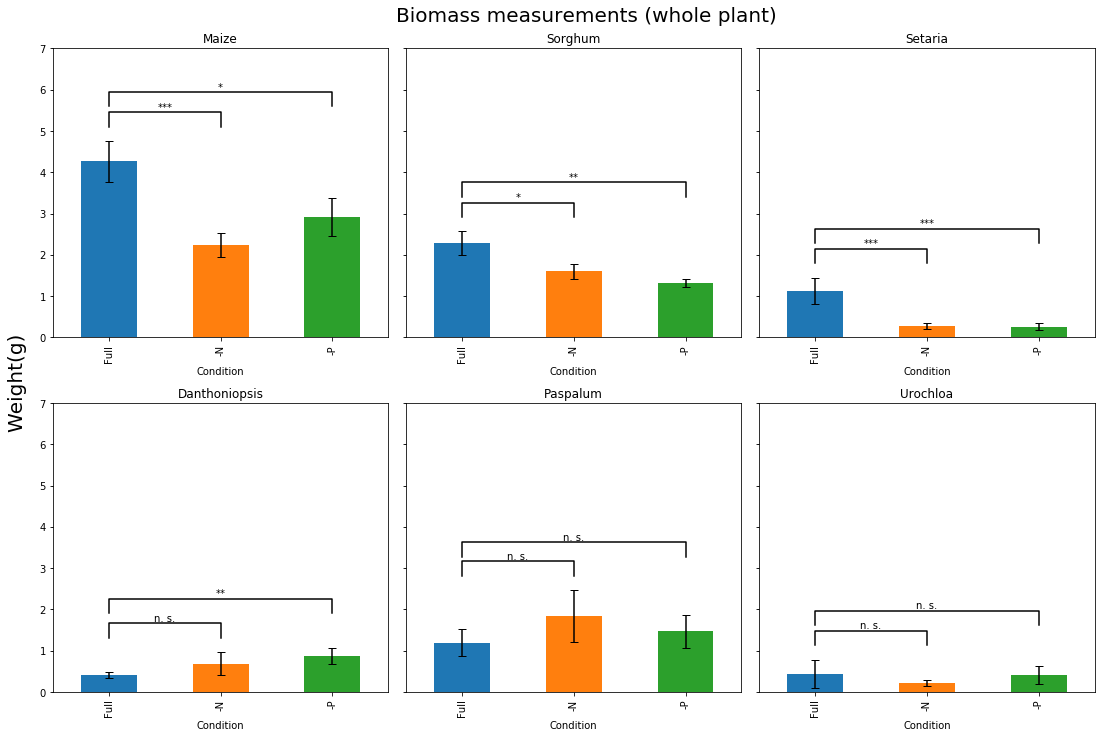

In [84]:

    
fig, ax = plt.subplots(2,3,sharey='row')  
#fig, ax = plt.subplots(2,3, sharex='col',sharey='row')
bar_plot('Maize',ax[0,0],dh=0.12)
bar_plot('Sorghum',ax[0,1],dh=0.12)
bar_plot('Setaria',ax[0,2],dh=0.12)
bar_plot('Danthoniopsis',ax[1,0],dh=0.12)
bar_plot('Paspalum',ax[1,1],dh=0.2)
bar_plot('Urochloa',ax[1,2],dh=.12)

plt.tight_layout()
fig.text(0.34,1,'Biomass measurements (whole plant)', fontsize=20,)
#fig.set_title('Biomass measurement for each species under Full nutrient, nitrogen and phosphur starvation')
#fig.set_xlabel('Species')
#ax.set_ylim(0,8)
fig.text(-0.02,0.5,'Weight(g)',va='center', rotation = 'vertical',fontsize=20)
plt.show()



In [86]:
weekdays = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
mapping = {day: i for i, day in enumerate(weekdays)}
mapping

{'Mon': 0, 'Tues': 1, 'Weds': 2, 'Thurs': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

In [92]:
[day for day in enumerate(weekdays)]

[(0, 'Mon'),
 (1, 'Tues'),
 (2, 'Weds'),
 (3, 'Thurs'),
 (4, 'Fri'),
 (5, 'Sat'),
 (6, 'Sun')]

Root Length

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [56]:
dfRLength = pd.read_csv('RootLength.csv',sep = ',' ,index_col = 'Species')
header = ['Species','Condition','Mean','STD','test_pvalue']
dfstat = pd.DataFrame(columns = header)
for aspecies in set(dfRLength.index):
    DataFull = dfRLength.loc[aspecies]['Full']
    meanFull = DataFull.mean()
    stdFull = DataFull.std()
    rowList = [[aspecies,'Full',meanFull,stdFull,'NA']]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
    DataN = dfRLength.loc[aspecies]['-N']
    meanN = DataN.mean()
    stdN = DataN.std()
    tFN = ttest_ind(DataFull,DataN)
    DataP = dfRLength.loc[aspecies]['-P']
    rowList = [[aspecies,'-N',meanN,stdN,tFN[1]]]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
    meanP = DataP.mean()
    stdP = DataP.std()
    tFP = ttest_ind(DataFull,DataP)
    rowList = [[aspecies,'-P',meanP,stdP,tFP[1]]]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
dfstat.set_index('Species',inplace=True)

In [64]:
def barplot_annotate_brackets(num1, num2, data, center, height, ax, yerr, dh, barh=.05, fs=None, maxasterix=None ):
    plt.sca(ax)
    if type(data) is str:
        text = data
    else:
        text = ''
        p = .05
        while data < p:
            text += '*'
            p /= 10.
            if maxasterix and len(text) == maxasterix:
                break
        if len(text) == 0:
            text = 'n. s.'
    lx, ly = center[num1], height[num1]+yerr[num1]
    rx, ry = center[num2], height[num2]+yerr[num2]
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
    y = max(ly, ry) + dh
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
    plt.plot(barx, bary, c='black',)
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
    plt.text(*mid, text, **kwargs,)
    
def bar_plot(species,ax, dh=None):
    if dh is not None:
        dh = dh
    ind = np.arange(3)
    width = 0.8
    p_value = np.array(dfstat.loc[species]['test_pvalue'])
    err = dfstat.pivot(columns = 'Condition', values = 'STD').loc[species][['Full','-N','-P']]
    Mean = dfstat.pivot(columns = 'Condition', values = 'Mean').loc[species][['Full','-N','-P']]
    Mean.plot.bar(x=species, figsize=(15,10), yerr = err, capsize = 4,ax=ax ,title = species, ylim=(0,50))
    barplot_annotate_brackets(0,1,float(p_value[1]), ind, Mean, yerr=err, dh=0.05, ax=ax )
    barplot_annotate_brackets(0,2,float(p_value[2]), ind, Mean, yerr=err, dh = dh, ax=ax )

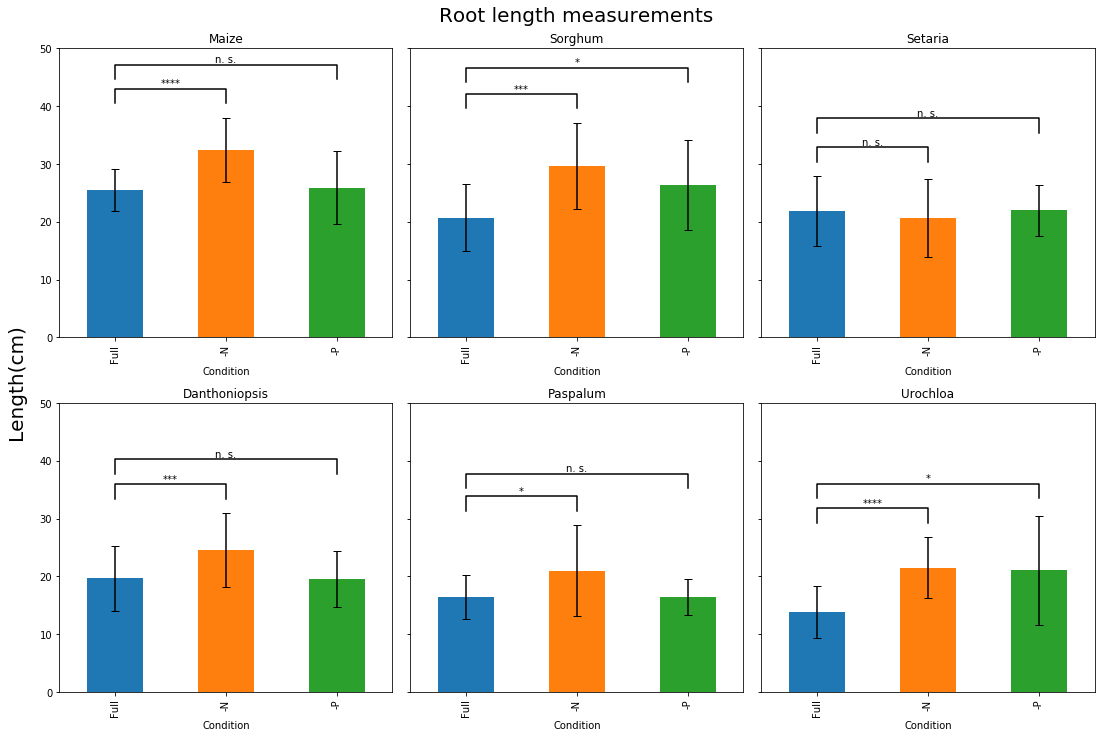

In [80]:
   
fig, ax = plt.subplots(2,3,sharey='row')  
#fig, ax = plt.subplots(2,3, sharex='col',sharey='row')
bar_plot('Maize',ax[0,0],dh=0.25)
bar_plot('Sorghum',ax[0,1],dh=0.2)
bar_plot('Setaria',ax[0,2],dh=0.15)
bar_plot('Danthoniopsis',ax[1,0],dh=0.25)
bar_plot('Paspalum',ax[1,1],dh=0.30)
bar_plot('Urochloa',ax[1,2],dh=0.06)

plt.tight_layout()
fig.text(0.38,1,'Root length measurements', fontsize=20,)
fig.text(-0.02,0.5,'Length(cm)',va='center', rotation = 'vertical',fontsize=20)
#fig.set_title('Biomass measurement for each species under Full nutrient, nitrogen and phosphur starvation')
#fig.set_xlabel('Species')
#ax.set_ylim(0,8)
plt.show()


# Plot expressed transcripts comparison between isoseq and new Pv.V1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
def barplot_annotate_brackets(num1, num2, data, center, height, ax, yerr, dh, barh=.05, fs=None, maxasterix=None ):
    plt.sca(ax)
    if type(data) is str:
        text = data
    else:
        text = ''
        p = .05
        while data < p:
            text += '*'
            p /= 10.
            if maxasterix and len(text) == maxasterix:
                break
        if len(text) == 0:
            text = 'n. s.'
    lx, ly = center[num1], height[num1]+yerr[num1]
    rx, ry = center[num2], height[num2]+yerr[num2]
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
    y = max(ly, ry) + dh
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
    plt.plot(barx, bary, c='black',)
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
    plt.text(*mid, text, **kwargs,)
    
def bar_plot(species,ax, dh=None):
    if dh is not None:
        dh = dh
    ind = np.arange(3)
    width = 0.8
    p_value = np.array(dfstat.loc[species]['test_pvalue'])
    err = dfstat.pivot(columns = 'Condition', values = 'STD').loc[species][['Full','-N','-P']]
    Mean = dfstat.pivot(columns = 'Condition', values = 'Mean').loc[species][['Full','-N','-P']]
    Mean.plot.bar(x=species, figsize=(15,10), yerr = err, capsize = 4,ax=ax ,title = species, ylim=(0,50))
    barplot_annotate_brackets(0,1,float(p_value[1]), ind, Mean, yerr=err, dh=0.05, ax=ax )
    barplot_annotate_brackets(0,2,float(p_value[2]), ind, Mean, yerr=err, dh = dh, ax=ax )

In [22]:
dfGEPV = pd.read_csv('TranscriptComparisonPaspalumOldvsNew.csv',sep = ',', index_col = 'Species' )
header = ['RefVersion','Condition','Mean','STD','test_pvalue']
dfGEPV.head()

,Full,-N,-P
Species,,,
PaspalumIsoseq,27570,26227,25985
PaspalumIsoseq,27850,27720,26168
PaspalumIsoseq,27415,26311,25705
PaspalumNewRef,30219,30377,30014
PaspalumNewRef,30434,31234,30212


In [35]:
ttest = ttest_ind(dfGEPV['Full']['PaspalumIsoseq'], dfGEPV['Full']['PaspalumNewRef'])

In [36]:
ttest

Ttest_indResult(statistic=-18.552620440379044, pvalue=4.967810523016097e-05)

In [11]:
dfGEPV.groupby('Species').mean()

,Full,-N,-P
Species,,,
PaspalumIsoseq,27611.666667,26752.666667,25952.666667
PaspalumNewRef,30296.666667,30814.000000,30119.666667


In [12]:
dfGEPV.groupby('Species').std()

,Full,-N,-P
Species,,,
PaspalumIsoseq,220.472976,838.787418,233.187335
PaspalumNewRef,119.274194,428.752843,99.671126


In [42]:
dfGEPV.transpose().index

Index(['Full', '-N', '-P'], dtype='object')

In [46]:
dfnew = dfGEPV.transpose()

In [50]:
dfnew.loc['Full']

Species
PaspalumIsoseq    27570
PaspalumIsoseq    27850
PaspalumIsoseq    27415
PaspalumNewRef    30219
PaspalumNewRef    30434
PaspalumNewRef    30237
Name: Full, dtype: int64

In [51]:
meanIso = []
meanNew = []
stdIso = []
stdNew = []

index = dfnew.index
for acondition in dfnew.index:
    print(acondition)
    t_test = ttest_ind(dfnew.loc[acondition].loc['PaspalumIsoseq'],dfnew.loc[acondition].loc['PaspalumNewRef'])
    meanIso.append(dfnew.loc[acondition].loc['PaspalumIsoseq'].mean())
    meanNew.append(dfnew.loc[acondition].loc['PaspalumNewRef'].mean())
    stdIso.append(dfnew.loc[acondition].loc['PaspalumIsoseq'].std())
    stdNew.append(dfnew.loc[acondition].loc['PaspalumNewRef'].std())
    print(t_test)

Full
Ttest_indResult(statistic=-18.552620440379044, pvalue=4.967810523016097e-05)
-N
Ttest_indResult(statistic=-7.467430376903424, pvalue=0.0017188965733521337)
-P
Ttest_indResult(statistic=-28.460506317299437, pvalue=9.070155963084772e-06)


In [52]:
df = pd.DataFrame({'IsoSeq': meanIso, 'NewRef':meanNew, 'stdIso': stdIso, 'stdNew' : stdNew}, index = index)

In [58]:
df

,IsoSeq,NewRef,stdIso,stdNew
Full,27611.666667,30296.666667,220.472976,119.274194
-N,26752.666667,30814.000000,838.787418,428.752843
-P,25952.666667,30119.666667,233.187335,99.671126


In [60]:
def barplot_annotate_brackets(num1, num2, data, center, height, ax, yerr, dh, barh=.05, fs=None, maxasterix=None ):
    plt.sca(ax)
    if type(data) is str:
        text = data
    else:
        text = ''
        p = .05
        while data < p:
            text += '*'
            p /= 10.
            if maxasterix and len(text) == maxasterix:
                break
        if len(text) == 0:
            text = 'n. s.'
    lx, ly = center[num1], height[num1]+yerr[num1]
    rx, ry = center[num2], height[num2]+yerr[num2]
    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)
    y = max(ly, ry) + dh
    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)
    plt.plot(barx, bary, c='black',)
    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs
    plt.text(*mid, text, **kwargs,)

ValueError: Cannot index with multidimensional key

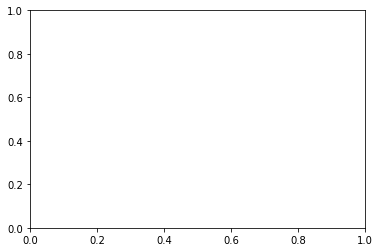

In [69]:
fig, ax = plt.subplots(sharey='row')  
#fig, ax = plt.subplots(2,3, sharex='col',sharey='row')
bar_plot(df[['IsoSeq','NewRef']],ax,dh=0.25)

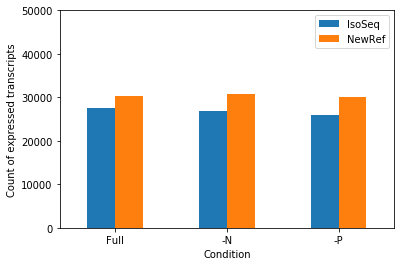

In [77]:
ind = np.arange(3)
ax = df[['IsoSeq','NewRef']].plot.bar( rot=0) #, yerr = list(df['stdIso'])+list(df['stdNew']))
ax.set_ylim(0,50000)
ax.set_xlabel('Condition')
ax.set_ylabel('Count of expressed transcripts')
p_value = [4.967810523016097e-05,0.0017188965733521337,9.070155963084772e-06]
Mean = df[['IsoSeq','NewRef']]
yerr = df[['stdIso','stdNew']]
#barplot_annotate_brackets(0,1,p_value, ind, Mean, yerr=yerr, dh=0.05, ax=ax )

In [66]:
yerr

,stdIso,stdNew
Full,220.472976,119.274194
-N,838.787418,428.752843
-P,233.187335,99.671126


In [ ]:
dfstat = pd.DataFrame(columns = header)
for aspecies in set(dfRLength.index):
    DataFull = dfRLength.loc[aspecies]['Full']
    meanFull = DataFull.mean()
    stdFull = DataFull.std()
    rowList = [[aspecies,'Full',meanFull,stdFull,'NA']]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
    DataN = dfRLength.loc[aspecies]['-N']
    meanN = DataN.mean()
    stdN = DataN.std()
    tFN = ttest_ind(DataFull,DataN)
    DataP = dfRLength.loc[aspecies]['-P']
    rowList = [[aspecies,'-N',meanN,stdN,tFN[1]]]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
    meanP = DataP.mean()
    stdP = DataP.std()
    tFP = ttest_ind(DataFull,DataP)
    rowList = [[aspecies,'-P',meanP,stdP,tFP[1]]]
    dfstat = dfstat.append(pd.DataFrame(rowList,columns = header))
dfstat.set_index('Species',inplace=True)

In [37]:
dfstat

,Condition,Mean,STD,test_pvalue
Species,,,,
PaspalumIsoseq,Full,27611.666667,220.472976,NA
PaspalumIsoseq,-N,26752.666667,838.787418,0.161395
PaspalumIsoseq,-P,25952.666667,233.187335,0.000860582
PaspalumNewRef,Full,30296.666667,119.274194,NA
PaspalumNewRef,-N,30814.000000,428.752843,0.11435
PaspalumNewRef,-P,30119.666667,99.671126,0.119849


TypeError: 'AxesSubplot' object is not subscriptable

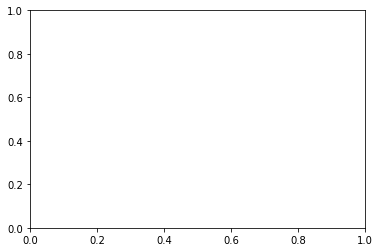

In [39]:
fig, ax = plt.subplots(sharey='row')  
#fig, ax = plt.subplots(2,3, sharex='col',sharey='row')
bar_plot('Condition',ax[0,0],dh=0.25)
#bar_plot('Sorghum',ax[0,1],dh=0.2)
#bar_plot('Setaria',ax[0,2],dh=0.15)
#bar_plot('Danthoniopsis',ax[1,0],dh=0.25)
#bar_plot('Paspalum',ax[1,1],dh=0.30)
#bar_plot('Urochloa',ax[1,2],dh=0.06)

plt.tight_layout()
fig.text(0.38,1,'Root length measurements', fontsize=20,)
fig.text(-0.02,0.5,'Length(cm)',va='center', rotation = 'vertical',fontsize=20)
#fig.set_title('Biomass measurement for each species under Full nutrient, nitrogen and phosphur starvation')
#fig.set_xlabel('Species')
#ax.set_ylim(0,8)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
import scipy
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('OldPlantsDryWeight.csv')
df.head()

,Species,AboveGround,Condition,Treatment
0,Maize,70.11,Full,Control
1,Maize,64.45,Full,Control
2,Maize,76.48,Full,Control
3,Maize,67.00,Full,Control
4,Maize,68.02,Full,Control


In [4]:
nt = df.loc[df['Treatment']=='Control', 'AboveGround'].values
valA = df.loc[df['Treatment']=='ValA', 'AboveGround'].values
tF, pF = scipy.stats.ttest_ind(nt, valA)
print(pF)

0.0021672040849310572


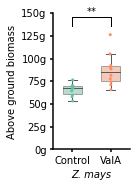

In [49]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.size'] = 10

def pcttck(x,pos):
    return "{0}g".format(int(x))
pter = FuncFormatter(pcttck)
fig, ax = plt.subplots(figsize=(2,2.7), tight_layout = True) 
plt.setp(ax.spines.values(), linewidth=1.5)
plt.setp(ax.spines.values(), linewidth=1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10,direction='out', length=3, width=1.5)
#sns.barplot(x = "Treatment", y = 'AboveGround',  data=df,  edgecolor = 'k', linewidth=1, palette = 'Set2', ci="sd",capsize=0.2,ax=ax)
sns.boxplot(x = "Treatment", y = 'AboveGround',  data=df,   fliersize=0, boxprops=dict(alpha = 0.5), width = 0.5, linewidth=1, palette = 'Set2', ax=ax)
sns.stripplot(x = "Treatment", y = 'AboveGround',  data=df, dodge = True,  jitter = 0.02,  s=3,  ax=ax, palette = 'Set2')
ax.set_xlabel('Z. mays', fontstyle = 'italic')
ax.set_xticks([0,1])
ax.set_xticklabels(['Control', 'ValA'])
ax.set_ylim(0,150)

ax.yaxis.set_major_formatter(pter)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .5)

x1, x2 = 0,1
vmax = df['AboveGround'].max() + 10
vheight = 10
t1 = '**'
plt.plot([x1,x1,x2,x2],[vmax, vmax + vheight, vmax + vheight, vmax], color = 'k', linewidth = 1)
ax.text((x1 + x2)* .5, vmax + vheight + 5, t1, ha ='center', va='center')

ax.set_ylabel('Above ground biomass',size=10)    
plt.savefig('oldPlant_dryweight.svg')
plt.savefig("oldPlant_dryweight.png",dpi = 500)
    